# ❓👥 Tag suggestion 2: Tests

|   |   |
|---|---|
| Project  |    [Catégorisez automatiquement des questions](#https://openclassrooms.com/fr/paths/148/projects/111/assignment)         |
| Date   |   March 2023   |
| Autor  | Ana Bernal                                                    |
| Data source | [StackExchange Data Explorer](https://data.stackexchange.com/stackoverflow/query/new) |
| Mentor | Samir Tanfous | 
| Notebook number  | 2 of 3                                                    |

**Description:** In this notebook we test different models and embeddings for classification of questions posted in the platform [stack overflow](https://stackoverflow.com/) and suggestion of tags.

# Table of contents
- [Libraries](#Libraries)
  - [Options](#Options)
  - [Functions](#Functions)
- [Data](#Data)
- [Bag of words: TF-IDF (supervised)](#Bag-of-words:-TF-IDF-(supervised))
  - [Vectorizing texts](#Vectorizing-texts)
  - [Classification](#Classification)
    - [LogisticRegression](#LogisticRegression)
      - [Evaluation: LogisticRegression](#Evaluation:-LogisticRegression)
    - [Naive-Bayes classifier (TD-IDF)](#Naive-Bayes-classifier-(TD-IDF))
      - [Evaluation: NaiveBayes](#Evaluation:-NaiveBayes)
    - [RandomForestClassifier](#RandomForestClassifier)
      - [Evaluation: RandomForestClassifier](#Evaluation:-RandomForestClassifier)
- [Word2vec (Supervised)](#Word2vec-(Supervised))
  - [Classification](#Classification)
    - [Logistic Regression](#Logistic-Regression)
      - [Evaluation: LogisticRegression](#Evaluation:-LogisticRegression)
    - [RandomForest](#RandomForest)
      - [Evaluation: RandomForestClassifier](#Evaluation:-RandomForestClassifier)
    - [Naive-Bayes classifier (TD-IDF)](#Naive-Bayes-classifier-(TD-IDF))
      - [Evaluation: NaiveBayes](#Evaluation:-NaiveBayes)
- [BERT (Supervised)](#BERT-(Supervised))
  - [Preparation fonctions](#Preparation-fonctions)
  - [Classification](#Classification)
    - [Logistic regression](#Logistic-regression)
      - [Evaluation](#Evaluation)
    - [RandomForest classifier](#RandomForest-classifier)
      - [Evaluation: RandomForestCl](#Evaluation:-RandomForestCl)
    - [Naive-Bayes classifier](#Naive-Bayes-classifier)
- [USE (Supervised)](#USE-(Supervised))
  - [Classification](#Classification)
    - [Logistic Regression](#Logistic-Regression)
      - [Evaluation: LogisticRegression](#Evaluation:-LogisticRegression)
    - [RandomForest](#RandomForest)
      - [Evaluation: RandomForestClassifier](#Evaluation:-RandomForestClassifier)
    - [Naive-Bayes classifier (TD-IDF)](#Naive-Bayes-classifier-(TD-IDF))
      - [Evaluation: NaiveBayes](#Evaluation:-NaiveBayes)
- [Comparing supervised models](#Comparing-supervised-models)
- [LDA (Non-supervised)](#LDA-(Non-supervised))
    - [Evaluation](#Evaluation)
- [Conclusion](#Conclusion)

# Libraries

In [2]:
# When in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.8 MB/s eta 0:00:00


In [3]:
# built in
import time
from itertools import cycle # for cycling through colors

# data and linear algebra
import numpy as np
import pandas as pd

# graphics & visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# sklearn NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# TensorFlow & keras
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# gensim
import gensim
from gensim.models import KeyedVectors

# BERT
import os
import transformers
from transformers import *

/usr/local/lib/python3.9/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


## Options

In [4]:
import warnings
warnings.filterwarnings('ignore')

os.environ["TF_KERAS"]='1'


Run the following two cells when in google colab

In [5]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.1 MB/s eta 0:00:00


## Functions

The following cell contains the functions that we use in this notebook.

In [6]:
def choose_best_thres(y_true, y_pred_proba):
    '''
    Returns a threshold between 0.1 and 0.9
    which maximizes the macro average f1-score,
    for a multilabel classification problem.

    Parameters:
        - y_true: binary array
        - y_pred_proba: array
            returned by some_estimator.predict_proba()
    '''
    f1_thr = {}
    for t in np.linspace(0.1,0.9,9): # testing thresholds 0.2, 0.3, up to 0.8
        classif_rep = classification_report(
            y_true, 
            (y_pred_proba > t).astype(int),
            target_names=tag_list,
            output_dict=True)
        f1_thr[t] =  classif_rep['macro avg']['f1-score']

    # choose threshold for maximal f1-score
    thresh = round(max(f1_thr, key=f1_thr.get),1)
    print(f'Threshold that maximizes f1-score: {thresh}')

    return thresh


def plot_classif_report(classif_report, tag_list, model_name, dataset_name, vectorization):
    '''
    Plots precision, recall and f1-score for each tag in tag_list.

    Parameters:
        - classif_report: dict
            It is the output of sklearn.metrics.classification_report(y_true,y_pred)
            after a multi-label multi-output classification.
        - tag_list: list of str
            The list of tags of the classification.
        - model_name, dataset_name: str
            for the title of the plot
    '''
    global f1_sco
    n_tags = len(tag_list)

    fig = plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.xticks(range(1,len(tag_list)+1),tag_list)
    colors = ['blueviolet', 'darkorange', 'dodgerblue']

    for metric,color in zip(['precision', 'recall', 'f1-score'], colors):
        y = [classif_report[tag][metric] for tag in tag_list]
        plt.scatter(range(1,n_tags+1),y,label=metric, c=color)
    plt.legend()
    plt.ylim(0,1.1)
    plt.xticks(rotation=70)

    macro_prec = round(classif_report['macro avg']['precision'],2)
    macro_rec = round(classif_report['macro avg']['recall'],2)
    macro_f1 = round(classif_report['macro avg']['f1-score'],2)
    f1_sco = macro_f1

    plt.text(30, 
             0.05, 
             f'Macro avg\nprecision: {macro_prec}\nrecall: {macro_rec}\nf1-score: {macro_f1}',
             bbox={'facecolor':'white', 'alpha':0.5})
    plt.title(f'Some metrics by tag\nModel: {model_name}, set: {dataset_name}, vectorization: {vectorization}')
    plt.show()

def diplay_and_plot_report(y_true, y_pred, model_name, dataset_name, vectorization):
        '''
        Displays the classification report together with the metrics
        (from the mul-label, multi-output classification) and plots
        the metrics for each tag.

        Parameters:
                - y_true: array
                        The true labels
                - y_pred: array
                        The prefictions
                - model_name, dataset_name: str
                        For the title of the plot
        '''

        classif_rep = classification_report(
                y_true, 
                y_pred,
                target_names=tag_list,
                output_dict=True)
        classif_rep_displ = classification_report(
                y_true, 
                y_pred,
                target_names=tag_list,
                output_dict=False)
        print(f'Classifier: {model_name}\tDataset: {dataset_name}')
        print('-'*70)
        print(classif_rep_displ)
        plot_classif_report(classif_rep, tag_list, model_name, dataset_name, vectorization)

def compute_roc_data(y_true,y_pred_proba,tag_list):
    '''
    Computes the data necessary to plot the OneVsRest
    ROC curves of our multilabel classification.
    Returns dictionnaries: fpr, tpr, roc_auc

    Based on sckikit-learn's example: 
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

    Parameters:
        - y_true: pd.DataFrame
        - y_pred: array
            returned by classification: predict probabilities
        - tag_list: list of str 
    '''
    global roc_auc_res

    n_tags = len(tag_list)
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.values.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")


    for i in range(n_tags):
        fpr[i], tpr[i], _ = roc_curve(y_true.values[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_tags):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_tags

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    roc_auc_res = roc_auc["macro"]

    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

    return fpr, tpr, roc_auc



def plot_roc_curves(
        fpr, tpr, roc_auc, model_name, dataset_name, vector_name,y_true,y_pred_proba):
    '''
    Plots the ROC curves of the OneVsRest classification
    for each tag.

    Based on scikit-learn's example:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

    Parameters:
        - fpr, tpr, roc_auc: dict, dict, dict
            Output of the function compute_roc_data
        - model_name, dataset_name: str
            For the title of the plot
    '''
    

    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=3,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=3,
    )
    
    colors = cycle(sns.color_palette("hls", 40))
    for (idx,class_id), color in zip(enumerate(tag_list), colors):
        RocCurveDisplay.from_predictions(
            y_true[f'tag_{class_id}'].values,
            y_pred_proba[:, idx],
            name=f"ROC curve for {class_id}",
            color=color,
            ax=ax,
        )

    plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC curves and AUC for each tag to One-vs-Rest\nmodel: {model_name}, dataset: {dataset_name},\n vectorizarion: {vector_name}")
    plt.legend(loc='center left', bbox_to_anchor = (1,0.5))
    plt.show()

def plot_LDA_scores(param_results):
    """
    Plots the silhouette score and Calinski-Harabasz score
    obtained from param_search_LDA
    """

    # Plotting the results from the previous grid
    fig = plt.figure(figsize=(10,4))
    sns.set_style("whitegrid")

    # axis for silhouette score
    ax = fig.add_subplot(1,2,1)
    sns.set_style("whitegrid")
    sns.lineplot(
        data = param_results,
        x = 'n_components',
        y = 'Silhouette score',
        marker='o',
        color='purple'
    )
    ax.set_xlabel('Number of topics')


    # axis for Calinski-Harabasz score
    ax = fig.add_subplot(1,2,2)
    sns.lineplot(
    data = param_results,
    x = 'n_components',
    y = 'Calinski-Harabasz score',
    marker='o',
    color='dodgerblue'
    )
    ax.set_xlabel('Number of topics')

    # Setting titles and displaying
    plt.suptitle(f'Metrics for different number of topics. LDA')
    plt.tight_layout()
    plt.show()

def param_search_LDA(X_tfidf, a, b): # 10, 31
    """
    Performs a parameter search for LDA,
    testing values for n_components in the range
    from 10 to 30.

    Parameters:

    - X_norm: np.array. It is the feature matrix, normalized.
    """

    # Specify parameters and
    n_components_range =  range(a,b),

    # Storing results
    result_grid = {
        'n_components' : [],
        'Silhouette score' : [],
        'Calinski-Harabasz score' : []
    }
    i = 0

    # Loop over parameters
    for comp in range(a,b):
        print(i)
        i += 1
        # Creating model and fitting
        lda_tfidf = LatentDirichletAllocation(n_components=comp,
                                              random_state=0)
        lda_tfidf.fit(X_tfidf)
        topic_assignments = lda_tfidf.transform(X_tfidf)
        labels = np.argmax(topic_assignments, axis=1)
        # Appending model metrics to the results
        result_grid['n_components'].append(comp)
        result_grid['Silhouette score'].append(
            silhouette_score(topic_assignments,labels).round(2)
            )
        result_grid['Calinski-Harabasz score'].append(
            calinski_harabasz_score(topic_assignments,labels)
        )

    
    # Display results
    result_grid_df = pd.DataFrame(result_grid)
    result_grid_df.set_index('n_components', inplace=True)
    
    return result_grid_df

def count_empty_LDA(X_tfidf, a, b): 
    """
    Performs a parameter search for LDA,
    testing values for n_components in the range
    from 10 to 30.
    It counts the number of topics empty suggested tag with LDA.

    Parameters:

    - X_norm: np.array. It is the feature matrix, normalized.
    """

    # Specify parameters and
    n_components_range =  range(a,b),

    # Storing results
    result_grid = {
        'n_components' : [],
        'n_empty_tag_topic' : [],
    }

    # Loop over parameters
    for comp in range(a,b):
        print(comp)
        # Creating model and fitting
        lda_tfidf = LatentDirichletAllocation(n_components=comp,
                                              random_state=0)
        lda_tfidf.fit(X_tfidf)
        topic_assignments = lda_tfidf.transform(X_tfidf)
        labels = np.argmax(topic_assignments, axis=1)
        # Appending model metrics to the results
        result_grid['n_components'].append(comp)

        # Creating list of 30 most popular words per topic
        words_topic = {}
        for index,topic in enumerate(lda_tfidf.components_):
            words_topic[index] = [tfidf.get_feature_names()[i] for i in topic.argsort()[-30:]]

        # Intersect this list with our tag official tag list
        topics_tags = {}
        for topic in words_topic:
            topics_tags[topic] = list(set(words_topic[topic]).intersection(tag_list))

        for key,value in topics_tags.items():
            print(f'Topic # {key}, Tags: {value}')

        # Counting empty tag set
        number_empty_tag_topic = 0
        for key,value in topics_tags.items():
            if len(value) == 0:
                number_empty_tag_topic += 1

        # Appending model metrics to the results
        result_grid['n_empty_tag_topic'].append(number_empty_tag_topic)
    
    # Display results
    result_grid_df = pd.DataFrame(result_grid)
    result_grid_df.set_index('n_components', inplace=True)
    
    return result_grid_df


# Data

In [7]:
# path = './data/'
path = './drive/MyDrive/colab-notebooks/'  # When working in colab
filename = 'processed_data_v011_sample.csv'

df = pd.read_csv(path + filename)
df.set_index('Id', inplace=True)

tag_list = [tag[4:] for tag in list(df.columns) if 'tag' in tag]

In [ ]:
df.head()

processed_text  \
Id                                                            
26371233  detect notification background music app write...   
25250762  xcode swift window title bar minimize resize b...   
443235    configuration system fail initialize exception...   
45223025  mongoose version error matching document find ...   
31262682  eclipse mars show jboss server thing try eclip...   

                                                       text  \
Id                                                            
26371233  detect MPMusicPlayerController notifications i...   
25250762  Xcode & Swift - Window without title bar but w...   
443235    .NET 3.5 - Configuration system failed to init...   
45223025  Mongoose - Version Error: No matching document...   
31262682  Eclipse Mars not showing Jboss Server <p>Here ...   

                                                      Title  \
Id                                                            
26371233  detect MPMusicPlayerController notifications i...   
25250762  Xcode & Swift - Window without title bar but w...   
443235    .NET 3.5 - Configuration system failed to init...   
45223025  Mongoose - Version Error: No matching document...   
31262682              Eclipse Mars not showing Jboss Server   

                                                       Body  Score  ViewCount  \
Id                                                                              
26371233  <p>I have a music app written in swift, I am u...     12       1663   
25250762  <p>I am currently using Swift in Xcode 6, Beta...     41      25715   
443235    <p>In my winform app, I am trying to add a use...     29      95163   
45223025  <p><strong>Context</strong>: I have a <code>Po...     13      24111   
31262682  <p>Here is the things I tried</p>\n\n<ol>\n<li...      7      31012   

          AnswerCount                             Tags  tag_c#  tag_java  ...  \
Id                                                                        ...   
26371233            2  ['ios', 'objective-c', 'swift']       0         0  ...   
25250762            7                        ['swift']       0         0  ...   
443235             12                         ['.net']       0         0  ...   
45223025            6        ['javascript', 'node.js']       0         0  ...   
31262682            4                         ['java']       0         1  ...   

          tag_multithreading  tag_asp.net-mvc  tag_ruby  tag_database  \
Id                                                                      
26371233                   0                0         0             0   
25250762                   0                0         0             0   
443235                     0                0         0             0   
45223025                   0                0         0             0   
31262682                   0                0         0             0   

          tag_wpf  tag_unit-testing  tag_macos  tag_arrays  tag_c++11  \
Id                                                                      
26371233        0                 0          0           0          0   
25250762        0                 0          0           0          0   
443235          0                 0          0           0          0   
45223025        0                 0          0           0          0   
31262682        0                 0          0           0          0   

          tag_django  
Id                    
26371233           0  
25250762           0  
443235             0  
45223025           0  
31262682           0  

[5 rows x 46 columns]

In [8]:
df.shape

(10000, 46)

# Bag of words: TF-IDF (supervised)

## Vectorizing texts

In [9]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(max_df=0.75,
                     min_df=0.0015
                     )

# Vectorize the processed text
X = tfidf.fit_transform(df.processed_text)

# Defining target vector
columns_tags = ['tag_'+tag for tag in tag_list]
y = df[columns_tags]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=5
)

In [10]:
print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (10000, 2014)


## Classification

Our tag suggesting problem is a Multilabel classification problem. For this, we use the OneVsRest strategy (and tool by scikit-learn), which trains/predicts one estimator per label. See [OneVsRest scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier), the [scikit-learn module on article about multilabel classif](https://scikit-learn.org/stable/modules/multiclass.html#onevsrestclassifier) and a [scikit-learn example on multilabel classif.](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multilabel.html#sphx-glr-auto-examples-miscellaneous-plot-multilabel-py)

For the **evaluation** of the models we base on the scikit-learn example : [ROC AUC for multilabel](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py), and we use the **macro average** for f1-score and ROC AUC. Since this way of averaging considers each tag as having the same importance (see this [stack exchange question](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)).

We used this Stackoverflow discussion about [Fine tuning estimator inside OneVsRestClassifier](https://stackoverflow.com/questions/12632992/gridsearch-for-an-estimator-inside-a-onevsrestclassifier).

- More on [Multiclass and multilabel classification](https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification).

In [11]:
classification_results = {'Vectorization' : [],
                          'Model' : [],
                          'Macro. avg. f1-score' : [],
                          'Macro. avg. AUC' : [],
                          'Fit time' : []}

def append_results(vectorization,model, f1, auc,fittime):
    classification_results['Vectorization'].append(vectorization)
    classification_results['Model'].append(model)
    classification_results['Macro. avg. f1-score'].append(round(f1,2))
    classification_results['Macro. avg. AUC'].append(round(auc,2))
    classification_results['Fit time'].append(round(fittime,2))
    

### LogisticRegression

We find the best hyperparameters first, optimizing the macro average for ROC-AUC

In [12]:
# Hyperparameters for logistic regression
parameters = {
    'estimator__penalty' : ['l1', 'l2'],
    'estimator__tol' : [1e-6, 1e-5, 1e-4, 1e-3],
    'estimator__C' : [0.01,0.05 ,0.1, 0.5, 0.7, 1],
    'estimator__fit_intercept' : [True, False],
    'estimator__solver' : ['liblinear','sag', 'saga']
}

# Instantiating OneVsRest Classifier
cl = OneVsRestClassifier(LogisticRegression())

# Random search for best hyperparameters
random_search = RandomizedSearchCV(
    estimator = cl,
    param_distributions= parameters,
    n_iter=40,
    scoring='roc_auc_ovr',
    random_state=5,
    n_jobs=-1
)

# Perform random search
random_search.fit(X_train, y_train)

# Instantiating BEST OneVsRest Classifier
cl = random_search.best_estimator_

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')


# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

# Print best parameters
print('The best parameters are:')
print(random_search.best_params_)
print('The best score is:')
print(random_search.best_score_)

fit time: 4.0981786251068115 secs.
predict time: 0.023499727249145508 secs.
The best parameters are:
{'estimator__tol': 0.0001, 'estimator__solver': 'saga', 'estimator__penalty': 'l2', 'estimator__fit_intercept': True, 'estimator__C': 0.7}
The best score is:
0.9457297643280306


In [13]:
# Instantiating OneVsRest Classifier with best parameters found
cl = OneVsRestClassifier(LogisticRegression(
    tol=0.0001,
    solver='saga',
    penalty='l2',
    fit_intercept=True,
    C=0.7
))

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')


# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

fit time: 7.329957962036133 secs.
predict time: 0.0384976863861084 secs.


In [14]:
# Choosing best classification threshold
thresh = choose_best_thres(y_train, y_pred_train_proba)

# Predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.1


#### Evaluation: LogisticRegression

Classifier: LogisticRegression	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.28      0.98      0.44      1012
          java       0.37      0.98      0.54       901
    javascript       0.43      0.98      0.60       769
        python       0.52      0.97      0.68       747
           c++       0.41      0.95      0.57       600
           ios       0.50      0.94      0.66       564
       android       0.64      0.91      0.75       507
          .net       0.34      0.89      0.49       526
          html       0.47      0.86      0.61       333
           php       0.78      0.81      0.80       313
   objective-c       0.48      0.76      0.59       292
        jquery       0.55      0.83      0.66       288
             c       0.49      0.77      0.60       240
        iphone       0.51      0.73      0.60       257
           sql       0.50      0.82      0

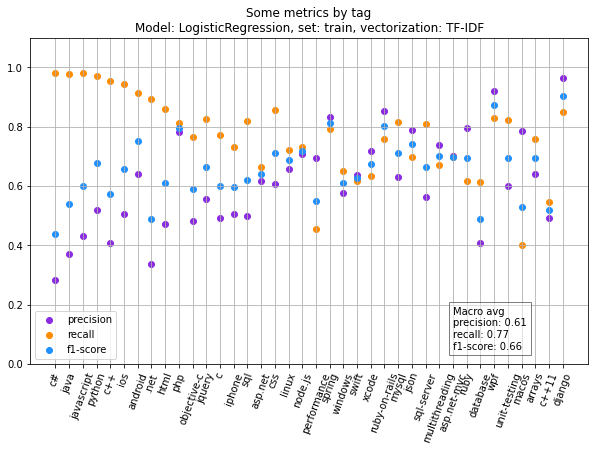

In [15]:
diplay_and_plot_report(y_train, y_pred_train, 'LogisticRegression', 'train', 'TF-IDF')

Classifier: LogisticRegression	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.25      0.96      0.40       467
          java       0.32      0.93      0.48       430
    javascript       0.42      0.92      0.58       409
        python       0.45      0.93      0.60       354
           c++       0.34      0.86      0.49       293
           ios       0.45      0.86      0.59       285
       android       0.57      0.80      0.67       249
          .net       0.25      0.67      0.37       239
          html       0.47      0.70      0.57       206
           php       0.73      0.63      0.67       164
   objective-c       0.30      0.48      0.37       147
        jquery       0.53      0.75      0.62       150
             c       0.33      0.52      0.40       131
        iphone       0.40      0.59      0.47       134
           sql       0.49      0.72      0.

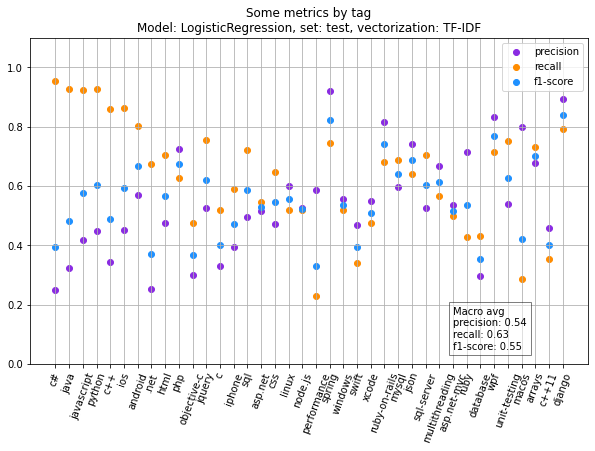

In [16]:
diplay_and_plot_report(y_test, y_pred_test, 'LogisticRegression', 'test','TF-IDF')

In [17]:
fpr, tpr, roc_auc = compute_roc_data(y_train,y_pred_train_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.97
Macro-averaged One-vs-Rest ROC AUC score:
0.98


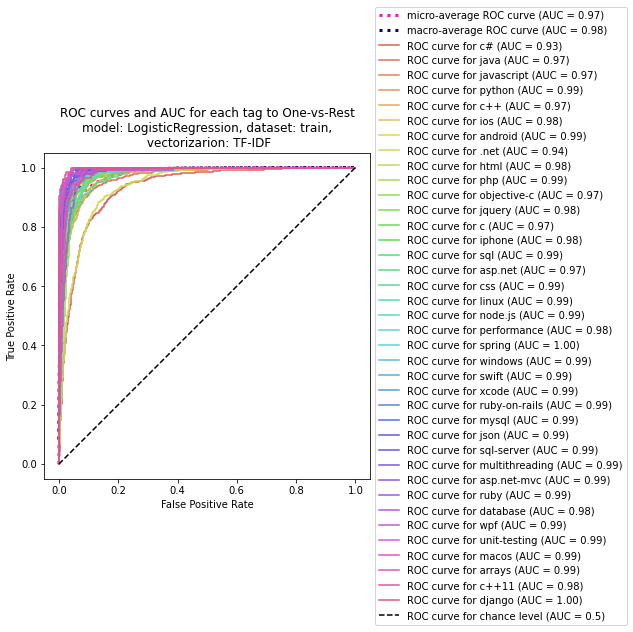

In [18]:
plot_roc_curves(
    fpr,tpr,roc_auc,'LogisticRegression', 'train', 'TF-IDF',y_train, y_pred_train_proba)

In [19]:
fpr, tpr, roc_auc = compute_roc_data(y_test,y_pred_test_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.94
Macro-averaged One-vs-Rest ROC AUC score:
0.95


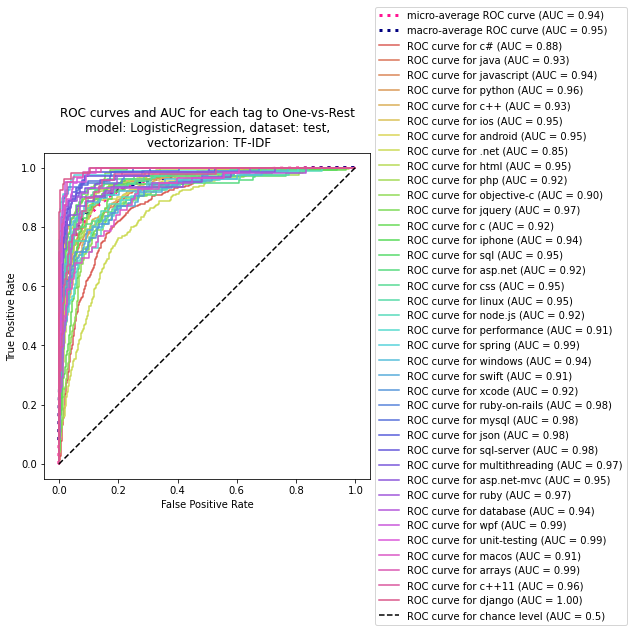

In [20]:
plot_roc_curves(
    fpr,tpr,roc_auc,'LogisticRegression', 'test', 'TF-IDF',y_test, y_pred_test_proba)

In [21]:
# Appending results for later compare
append_results(vectorization='TF-IDF',
               model='LogisticRegression', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

In [22]:
classification_results

{'Vectorization': ['TF-IDF'],
 'Model': ['LogisticRegression'],
 'Macro. avg. f1-score': [0.55],
 'Macro. avg. AUC': [0.95],
 'Fit time': [7.33]}

### Naive-Bayes classifier (TD-IDF)

In [23]:
parameters = {
    'estimator__alpha' : [0.05, 0.2, 0.5, 1],
    'estimator__fit_prior' : [True, False]
}

# Instantiating OneVsRest Classifier
cl = OneVsRestClassifier(MultinomialNB())

# Grid search for best hyperparameters
grid_search = GridSearchCV(
    estimator = cl,
    param_grid= parameters,
    scoring='roc_auc_ovr',
    verbose=2,
    n_jobs=-1
)

# Performing grid search
grid_search.fit(X_train, y_train)

# Instantiating Best OneVsRest Classifier
cl = grid_search.best_estimator_

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

# Print best parameters
print('The best parameters are:')
print(grid_search.best_params_)
print('The best score is:')
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
fit time: 0.11095976829528809 secs.
predict time: 0.06195712089538574 secs.
The best parameters are:
{'estimator__alpha': 0.05, 'estimator__fit_prior': True}
The best score is:
0.9309356232114998


In [24]:
# Choosing best threshold for classification
thresh = choose_best_thres(y_train, y_pred_train_proba)

# predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.2


#### Evaluation: NaiveBayes

Classifier: MultinomialNB	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.63      0.82      0.71      1012
          java       0.74      0.79      0.76       901
    javascript       0.67      0.86      0.75       769
        python       0.78      0.86      0.82       747
           c++       0.64      0.81      0.71       600
           ios       0.68      0.81      0.74       564
       android       0.77      0.85      0.81       507
          .net       0.61      0.61      0.61       526
          html       0.60      0.76      0.67       333
           php       0.89      0.72      0.79       313
   objective-c       0.59      0.66      0.63       292
        jquery       0.62      0.78      0.69       288
             c       0.67      0.73      0.70       240
        iphone       0.59      0.71      0.64       257
           sql       0.66      0.87      0.75  

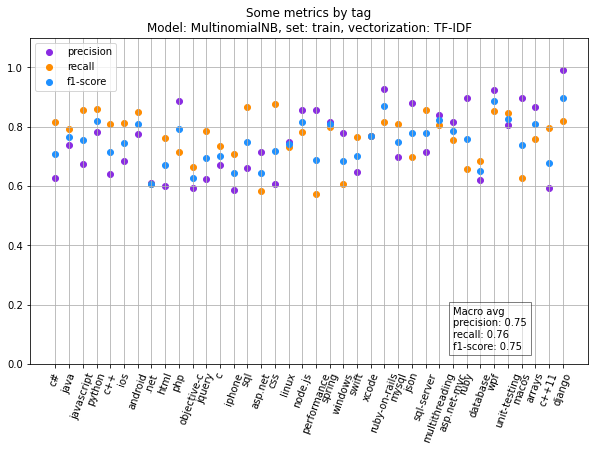

In [25]:
diplay_and_plot_report(y_train, y_pred_train, 'MultinomialNB', 'train', 'TF-IDF')

Classifier: MultinomialNB	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.55      0.67      0.61       467
          java       0.65      0.68      0.67       430
    javascript       0.62      0.69      0.65       409
        python       0.67      0.67      0.67       354
           c++       0.54      0.67      0.60       293
           ios       0.62      0.67      0.64       285
       android       0.66      0.64      0.65       249
          .net       0.37      0.25      0.30       239
          html       0.45      0.44      0.44       206
           php       0.77      0.35      0.48       164
   objective-c       0.39      0.37      0.38       147
        jquery       0.52      0.57      0.55       150
             c       0.39      0.30      0.34       131
        iphone       0.43      0.46      0.44       134
           sql       0.62      0.55      0.58   

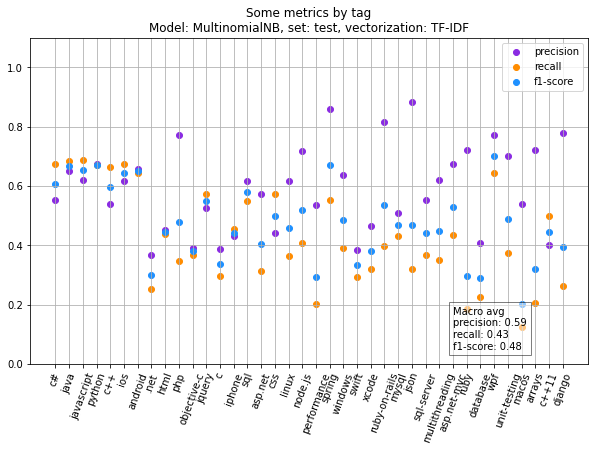

In [26]:
diplay_and_plot_report(y_test, y_pred_test, 'MultinomialNB', 'test', 'TF-IDF')

In [27]:
fpr, tpr, roc_auc = compute_roc_data(y_train,y_pred_train_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.99
Macro-averaged One-vs-Rest ROC AUC score:
0.99


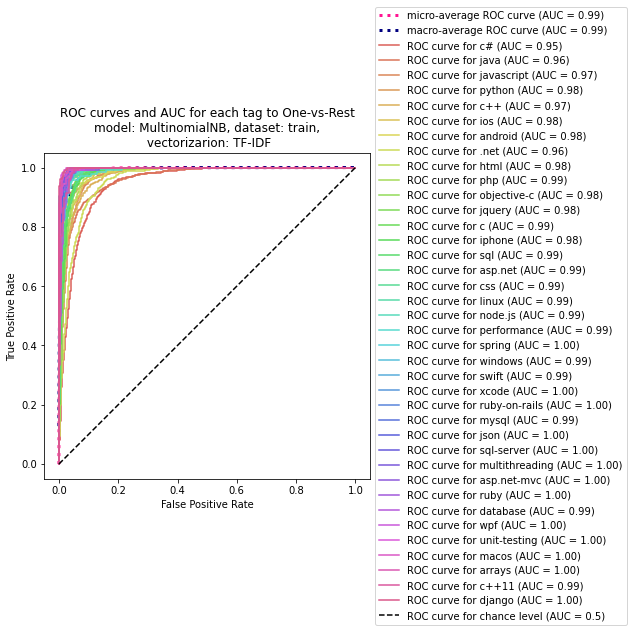

In [28]:
plot_roc_curves(
    fpr,tpr,roc_auc,'MultinomialNB', 'train','TF-IDF',y_train, y_pred_train_proba)

In [29]:
fpr, tpr, roc_auc = compute_roc_data(y_test,y_pred_test_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.94
Macro-averaged One-vs-Rest ROC AUC score:
0.93


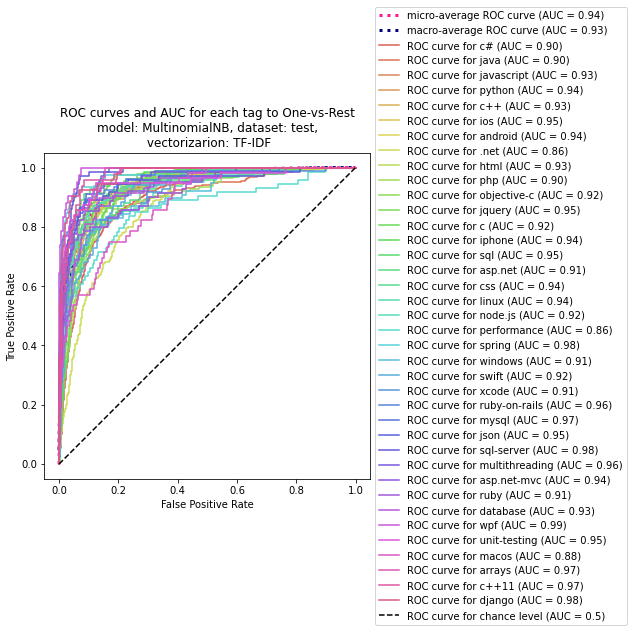

In [ ]:
plot_roc_curves(
    fpr,tpr,roc_auc,'MultinomialNB', 'test','TF-IDF',y_test, y_pred_test_proba)

In [30]:
# Appending results for later compare
append_results(vectorization='TF-IDF',
               model='MultinomialNB', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

In [31]:
classification_results

{'Vectorization': ['TF-IDF', 'TF-IDF'],
 'Model': ['LogisticRegression', 'MultinomialNB'],
 'Macro. avg. f1-score': [0.55, 0.48],
 'Macro. avg. AUC': [0.95, 0.93],
 'Fit time': [7.33, 0.11]}

### RandomForestClassifier

We tried to fine tune this random forest classifier, but it extremely long time (did not finish). We decide to use the default hyperparameters to compare. These overfit the data, and it would be very interesting to tune this model.

The long computation times though, compared to the other models make this model not practical in this case.

In [34]:
# # Hyperparameter tuning for RandomForest

# parameters = {
#     'estimator__n_estimators' : [50, 100, 150, 200],
#     'estimator__max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
#     'estimator__min_samples_split' : [2,5,10],
#     'estimator__min_samples_leaf' : [1,2,4],
#     'estimator__bootstrap' : [True, False],
#     'estimator__max_features' : ['sqrt', 'log2']
# }

# # Instantiating OneVsRest Classifier
# cl = OneVsRestClassifier(RandomForestClassifier())

# # Random search for best hyperparameters
# random_search = RandomizedSearchCV(
#     estimator = cl,
#     param_distributions= parameters,
#     n_iter=20,
#     scoring='roc_auc_ovr',
#     verbose=2,
#     random_state=5,
#     n_jobs=-1
# )

# # Perform random search
# random_search.fit(X_train, y_train)

# # Instantiating OneVsRest Classifier default parameters
# cl = random_search.best_estimator_

# # Fitting classifier
# start = time.time()
# cl.fit(X_train,y_train)
# finish = time.time()
# fittime = finish - start
# print(f'fit time: {fittime} secs.')

# # Predicting (with probabilites)
# start = time.time()
# y_pred_train_proba = cl.predict_proba(X_train)
# finish = time.time()
# print(f'predict time: {finish - start} secs.')

# y_pred_test_proba = cl.predict_proba(X_test)

# # Print best parameters
# print('The best parameters are:')
# print(random_search.best_params_)
# print('The best score is:')
# print(random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: ignored

In [35]:
# Instantiating OneVsRest Classifier DEFAULT parameters
cl = OneVsRestClassifier(RandomForestClassifier())

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

fit time: 125.01397204399109 secs.
predict time: 7.354036569595337 secs.


In [36]:
# choose threshold for maximal f1-score
thresh = choose_best_thres(y_train, y_pred_train_proba)

# predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.5


#### Evaluation: RandomForestClassifier

Classifier: RandomForestClassifier	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       1.00      1.00      1.00      1012
          java       1.00      1.00      1.00       901
    javascript       1.00      1.00      1.00       769
        python       1.00      1.00      1.00       747
           c++       1.00      1.00      1.00       600
           ios       1.00      1.00      1.00       564
       android       1.00      1.00      1.00       507
          .net       1.00      1.00      1.00       526
          html       1.00      1.00      1.00       333
           php       1.00      1.00      1.00       313
   objective-c       1.00      1.00      1.00       292
        jquery       1.00      1.00      1.00       288
             c       1.00      1.00      1.00       240
        iphone       1.00      1.00      1.00       257
           sql       1.00      1.00   

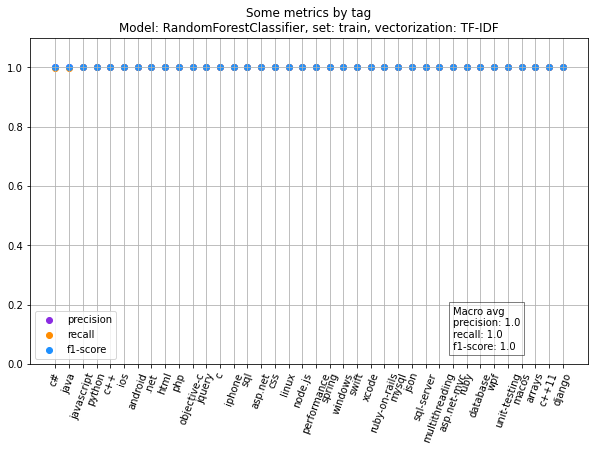

In [37]:
diplay_and_plot_report(y_train, y_pred_train, 'RandomForestClassifier', 'train', 'TF-IDF')

Classifier: RandomForestClassifier	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.69      0.16      0.27       467
          java       0.83      0.67      0.74       430
    javascript       0.75      0.50      0.60       409
        python       0.92      0.74      0.82       354
           c++       0.86      0.29      0.43       293
           ios       0.80      0.56      0.66       285
       android       0.93      0.65      0.76       249
          .net       0.38      0.01      0.02       239
          html       0.90      0.04      0.08       206
           php       0.88      0.60      0.72       164
   objective-c       0.60      0.04      0.08       147
        jquery       0.82      0.37      0.51       150
             c       0.00      0.00      0.00       131
        iphone       0.74      0.15      0.25       134
           sql       1.00      0.04    

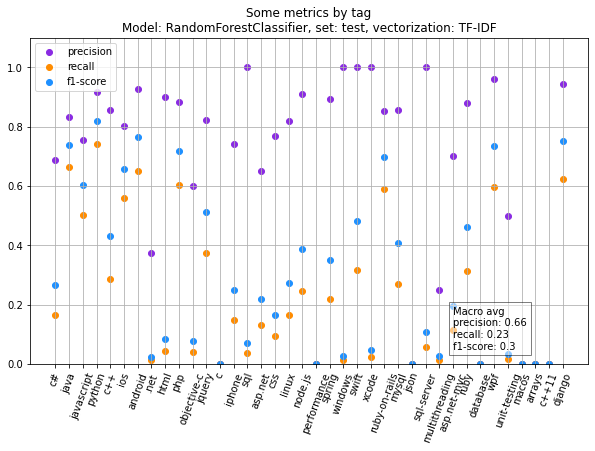

In [38]:
diplay_and_plot_report(y_test, y_pred_test, 'RandomForestClassifier', 'test', 'TF-IDF')

In [39]:
fpr, tpr, roc_auc = compute_roc_data(y_train,y_pred_train_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
1.00


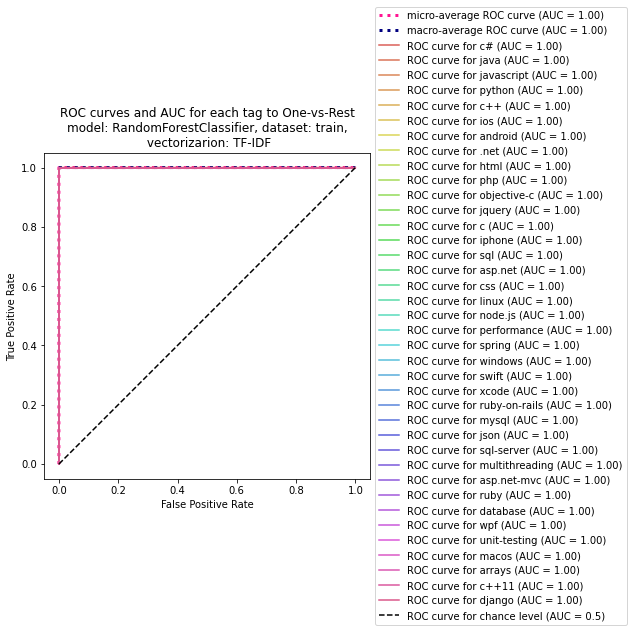

In [40]:
plot_roc_curves(
    fpr,tpr,roc_auc,'RandomForestClassifier', 'train','TF-IDF',y_train, y_pred_train_proba)

In [41]:
fpr, tpr, roc_auc = compute_roc_data(y_test,y_pred_test_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.94
Macro-averaged One-vs-Rest ROC AUC score:
0.92


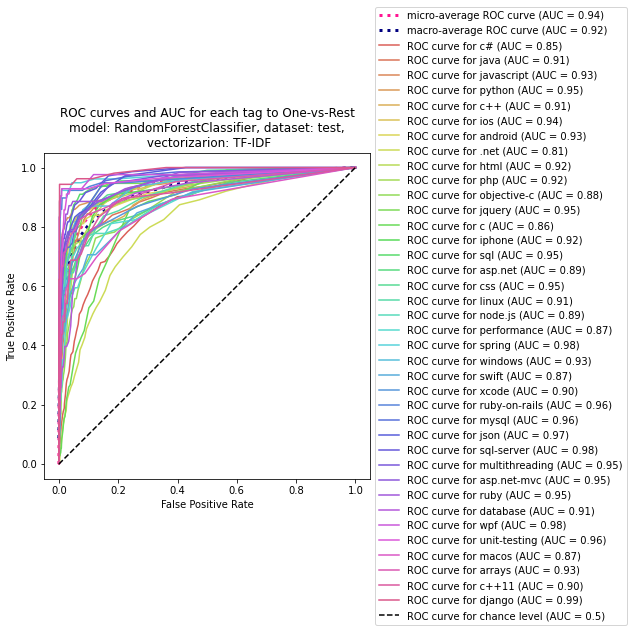

In [42]:
plot_roc_curves(
    fpr,tpr,roc_auc,'RandomForestClassifier', 'test','TF-IDF',y_test, y_pred_test_proba)

In [43]:
# Appending results for later compare
append_results(vectorization='TF-IDF',
               model='RandomForestCl', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

In [44]:
classification_results

{'Vectorization': ['TF-IDF', 'TF-IDF', 'TF-IDF'],
 'Model': ['LogisticRegression', 'MultinomialNB', 'RandomForestCl'],
 'Macro. avg. f1-score': [0.55, 0.48, 0.3],
 'Macro. avg. AUC': [0.95, 0.93, 0.92],
 'Fit time': [7.33, 0.11, 125.01]}

# Word2vec (Supervised)

The steps of this part of the processing + modeling + classification are:

* We create and train a Word2Vec model with our sentences/processed text. This model provides a **vocabulary**.
  
* From this **vocabulary** and with [**tensorflow.keras.preprocessing.text.Tokenizer**](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) we create an **index** for our vocabulary and turn each of our sentences into a padded **sequence** of length 33 (the mean of the length of sentences) assigning each word on the sentence to their index.

* We then create an **Embedding matrix** where each row corresponds to a word of our vocabulary and is a vector of dimension 300 provided by our Word2Vec trained model.

* Then we create a tensorflow.keras model with an [**Embedding layer**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) and our embedding matrix as weights. This model uses [GlobalAveragePooling1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D) to make an average of the embeddings.

* Finally we use the embedding model to predict in our sentences/processed text and this gives us a feature matrix, ready to be splitted in train/test sets and we perform different classifications models.

In [45]:
# Calulating some statistics for the length (in # of words) of our sentences
df.processed_text.apply(lambda x:len(x.split())).describe()

count    10000.000000
mean        47.388300
std         32.819547
min          3.000000
25%         25.000000
50%         39.000000
75%         59.000000
max        292.000000
Name: processed_text, dtype: float64

The mean of the length is 32 words per sentence, we choose this value as `maxlen`.

Creation and training of the Word2Vec model:

In [46]:
# Build & train Word2Vec model
print("Build & train Word2Vec model ...")

# Word2Vec model parameters
w2v_size=300
w2v_window=5
w2v_min_count=20
w2v_epochs=100 
maxlen = 32 
sentences = df['processed_text'].to_list()
sentences = [text.split() for text in sentences]

# Instantiate model
# w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, 
#                                    vector_size=w2v_size,
#                                    window=w2v_window,
#                                    # max_final_vocab=2000,
#                                    workers=1)

# Instantiate model
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, 
                                   vector_size=w2v_size,
                                   window=w2v_window,
                                   # max_final_vocab=2000,
                                   workers=1)

# Building vocabulary
w2v_model.build_vocab(sentences)

# Training the model
w2v_model.train(sentences, 
                total_examples=w2v_model.corpus_count, # Since = sentences to build
                epochs=w2v_epochs)

# Model vectors (words <--> embeddings)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key

print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

# Save/load model
# model_vectors.save('word2vecV1.wordvectors')  # Store
# model_vectors = KeyedVectors.load('word2vecV1.wordvectors', mmap='r')  # Load

# If older gensim version
# w2v_words = list(model_vectors.vocab.keys())

Build & train Word2Vec model ...
Vocabulary size: 2134
Word2Vec trained


In [47]:
# Display some words of our vocabulary
print(f'The first 10 words of our vocabulary are:\n {w2v_words[:10]}')

The first 10 words of our vocabulary are:
 ['code', 'work', 'use', 'try', 'file', 'want', 'way', 'error', 'need', 'run']


In [48]:
# Inserting a non-word
w2v_words.insert(0,'')
w2v_words[:10]

['', 'code', 'work', 'use', 'try', 'file', 'want', 'way', 'error', 'need']

In [49]:
# display the first 10 coordinates of the word python in our vocab.
print(f"Example: The first 10 coordinates of the vector associated to the word python:\n {model_vectors['python'][:10]}")

Example: The first 10 coordinates of the vector associated to the word python:
 [ 0.39939713 -0.40650746 -0.98120797  1.4155328   0.20339684 -0.30614898
  0.13168153  0.05809788 -0.49654502  0.45783257]


In [50]:
# Display the most similar words to 'python'
print('The most similar words to python are:')
w2v_model.wv.most_similar('python')

The most similar words to python are:


[('theory', 0.3638201951980591),
 ('refuse', 0.3528735935688019),
 ('experiment', 0.3369831442832947),
 ('criterion', 0.33543771505355835),
 ('winforms', 0.32776838541030884),
 ('replicate', 0.3250358998775482),
 ('template', 0.30194762349128723),
 ('fit', 0.30081450939178467),
 ('xib', 0.29964348673820496),
 ('tablet', 0.2917824387550354)]

We prepare the sentences from our processed text.

In [51]:
# Creation of index with our vocabulary
tokenizer = Tokenizer(filters='\t\n') # tensorflow.keras.preprocessing.text
# Updating internal vocabulary (create word index from our vocabulary)
tokenizer.fit_on_texts(w2v_words)

# Printing summary
print(f'# of words in our vocabulary: {len(w2v_words)}')
print(f'# of words in our tokenizer.word_index: {len(tokenizer.word_index)}')
print('First 5 words in our vocabulary:')
print(' ', w2v_words[:5])
print('First 5 words in tokenizer.word_index')
print(' ', list(tokenizer.word_index.items())[:5])


# of words in our vocabulary: 2135
# of words in our tokenizer.word_index: 2134
First 5 words in our vocabulary:
  ['', 'code', 'work', 'use', 'try']
First 5 words in tokenizer.word_index
  [('code', 1), ('work', 2), ('use', 3), ('try', 4), ('file', 5)]


In [52]:
# Transforming each sentence to a sequence (following tokenizer.word_index)
sequences = tokenizer.texts_to_sequences(sentences)

# Padding sequences so they all have the same length
x_sentences = pad_sequences(sequences,
                            maxlen=maxlen,
                            padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print(f'Number of unique words: {num_words}\n')

print('Example:')
print(f'The sentence {sentences[0]},')
print(f'Corresponding to {sequences[0]}')
print(f'becomes the sequence: {x_sentences[0]}')

Number of unique words: 2135

Example:
The sentence ['detect', 'notification', 'background', 'music', 'app', 'write', 'mpmusicplayercontroller.systemmusicplayer', 'try', 'applicationmusicplayer', 'music', 'play', 'background', 'expect', 'app', 'background', 'need', 'playback', 'state', 'change', 'notification', 'app', 'determine', 'song', 'play', 'following', 'viewdidload', 'method', 'method', 'playbackchange', 'call', 'state', 'application', 'foreground', 'app', 'background', 'remember', 'ios', 'deprecate', 'notification', 'background', 'idea', 'go'],
Corresponding to [315, 372, 221, 1857, 14, 37, 4, 1857, 254, 221, 138, 14, 221, 9, 1810, 243, 33, 372, 14, 447, 1946, 254, 252, 16, 16, 43, 243, 19, 14, 221, 1086, 183, 896, 372, 221, 86, 124]
becomes the sequence: [  37    4 1857  254  221  138   14  221    9 1810  243   33  372   14
  447 1946  254  252   16   16   43  243   19   14  221 1086  183  896
  372  221   86  124]


We now create the **embedding matrix** of our vocabulary

In [53]:
# Creation of the embedding matrix
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print(f'Embedding matrix size : {embedding_matrix.shape}')

Word embedding rate :  1.0
Embedding matrix size : (2135, 300)


We are now ready to create the **embedding model**

In [54]:
# Creation of model
input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')

# Creation of the embedding
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights=[embedding_matrix],
                         input_length=maxlen)(word_input)

word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 embedding (Embedding)       (None, 32, 300)           640500    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 640,500
Trainable params: 640,500
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Model execution: getting the embeddings for our documents
embeddings = embed_model.predict(x_sentences)
print(f'The embedding shape of our documents is: {embeddings.shape}')

313/313 [==============================] - 1s 2ms/step
The embedding shape of our documents is: (10000, 300)


We can now obtain our **feature matrix**:

In [56]:
X = embeddings
print(f'Shape of feature matrix: {X.shape}')

# Defining target vector
columns_tags = ['tag_'+tag for tag in tag_list]
y = df[columns_tags]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=5
)

Shape of feature matrix: (10000, 300)


## Classification

### Logistic Regression

In [57]:
# Hyperparameters for logistic regression
parameters = {
    'estimator__penalty' : ['l1', 'l2'],
    'estimator__tol' : [1e-6, 1e-5, 1e-4, 1e-3],
    'estimator__C' : [0.01,0.05 ,0.1, 0.5, 0.7, 1],
    'estimator__fit_intercept' : [True, False],
    'estimator__solver' : ['liblinear','sag', 'saga']
}

# Instantiating OneVsRest Classifier
cl = OneVsRestClassifier(LogisticRegression())

# Random search for best hyperparameters
random_search = RandomizedSearchCV(
    estimator = cl,
    param_distributions= parameters,
    n_iter=20,
    scoring='roc_auc_ovr',
    random_state=5,
    n_jobs=-1
)

# Perform random search
random_search.fit(X_train, y_train)

# Instantiating BEST OneVsRest Classifier
cl = random_search.best_estimator_

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

KeyboardInterrupt: ignored

In [ ]:
# Print best parameters
print('The best parameters are:')
print(random_search.best_params_)
print('The best score is:')
print(random_search.best_score_)

The best parameters are:
{'estimator__tol': 0.0001, 'estimator__solver': 'sag', 'estimator__penalty': 'l2', 'estimator__fit_intercept': True, 'estimator__C': 0.05}
The best score is:
0.9245327406615254


In [58]:
# Instantiating OneVsRest Classifier with BEST parameters found
cl = OneVsRestClassifier(LogisticRegression(
    tol=0.0001,
    solver='sag',
    penalty='l2',
    fit_intercept=True,
    C=0.05
))

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

fit time: 20.978945016860962 secs.
predict time: 0.0718376636505127 secs.


In [59]:
thresh = choose_best_thres(y_train, y_pred_train_proba)

# Predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.2


#### Evaluation: LogisticRegression

Classifier: LogisticRegression	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.49      0.74      0.59      1012
          java       0.58      0.73      0.65       901
    javascript       0.56      0.75      0.64       769
        python       0.67      0.76      0.71       747
           c++       0.61      0.76      0.68       600
           ios       0.63      0.71      0.67       564
       android       0.71      0.72      0.71       507
          .net       0.42      0.46      0.44       526
          html       0.51      0.62      0.56       333
           php       0.62      0.50      0.55       313
   objective-c       0.43      0.39      0.41       292
        jquery       0.51      0.55      0.53       288
             c       0.52      0.58      0.55       240
        iphone       0.43      0.38      0.40       257
           sql       0.51      0.60      0

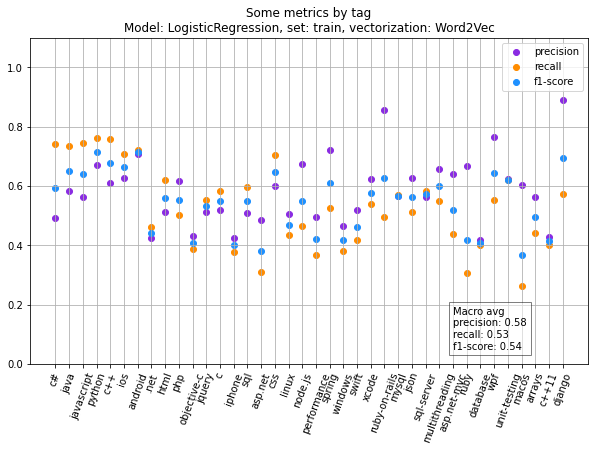

In [60]:
diplay_and_plot_report(y_train, y_pred_train, 'LogisticRegression', 'train', 'Word2Vec')

Classifier: LogisticRegression	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.46      0.69      0.56       467
          java       0.50      0.66      0.57       430
    javascript       0.55      0.71      0.62       409
        python       0.59      0.70      0.64       354
           c++       0.57      0.71      0.63       293
           ios       0.57      0.65      0.60       285
       android       0.62      0.65      0.64       249
          .net       0.35      0.36      0.35       239
          html       0.47      0.50      0.48       206
           php       0.60      0.39      0.47       164
   objective-c       0.29      0.29      0.29       147
        jquery       0.51      0.59      0.55       150
             c       0.39      0.44      0.42       131
        iphone       0.37      0.39      0.38       134
           sql       0.55      0.51      0.

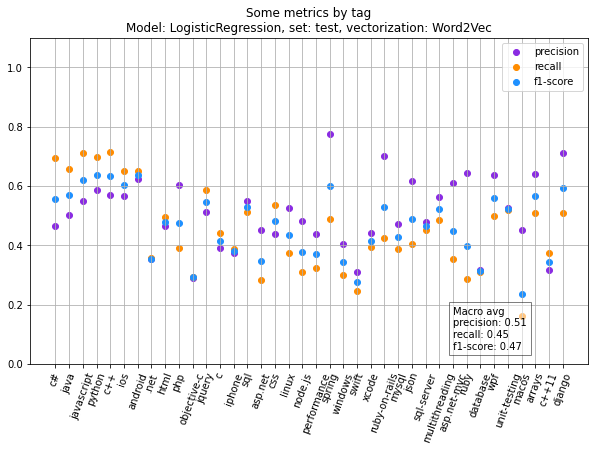

In [61]:
diplay_and_plot_report(y_test, y_pred_test, 'LogisticRegression', 'test','Word2Vec')

In [62]:
fpr, tpr, roc_auc = compute_roc_data(y_train,y_pred_train_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.95
Macro-averaged One-vs-Rest ROC AUC score:
0.95


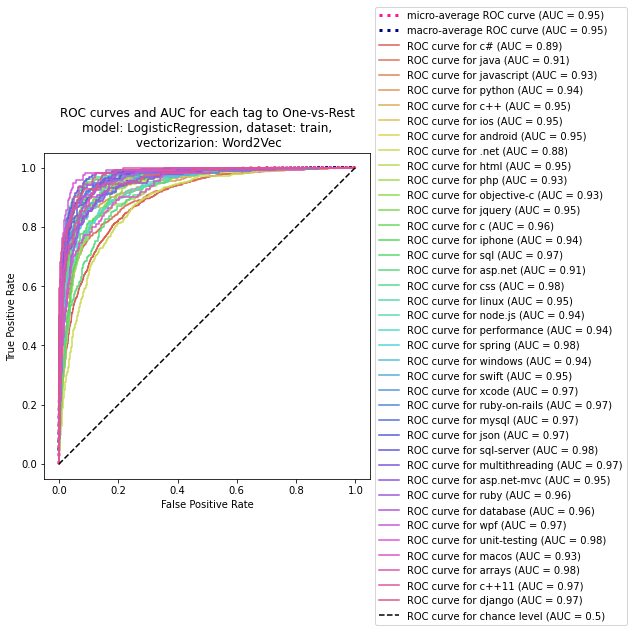

In [63]:
plot_roc_curves(
    fpr,tpr,roc_auc,'LogisticRegression', 'train','Word2Vec',y_train, y_pred_train_proba)

In [64]:
fpr, tpr, roc_auc = compute_roc_data(y_test,y_pred_test_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.93
Macro-averaged One-vs-Rest ROC AUC score:
0.92


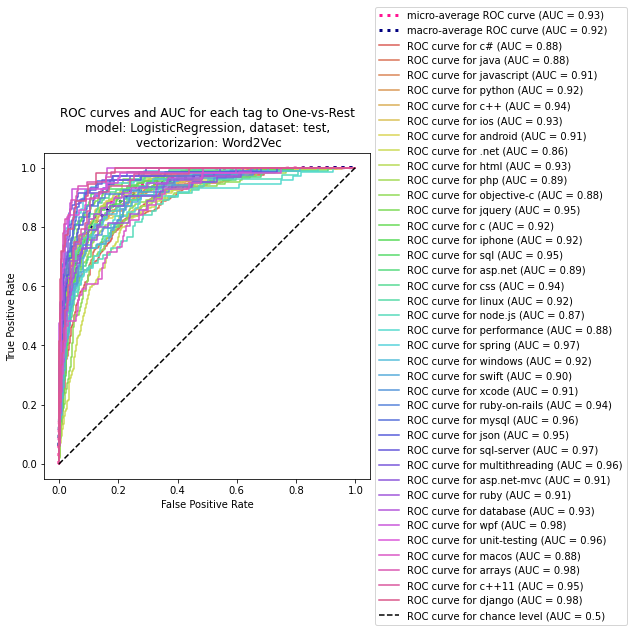

In [65]:
plot_roc_curves(
    fpr,tpr,roc_auc,'LogisticRegression', 'test','Word2Vec',y_test, y_pred_test_proba)

In [66]:
# Appending results for later compare
append_results(vectorization='Word2Vec',
               model='LogisticRegression', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

In [67]:
classification_results

{'Vectorization': ['TF-IDF', 'TF-IDF', 'TF-IDF', 'Word2Vec'],
 'Model': ['LogisticRegression',
  'MultinomialNB',
  'RandomForestCl',
  'LogisticRegression'],
 'Macro. avg. f1-score': [0.55, 0.48, 0.3, 0.47],
 'Macro. avg. AUC': [0.95, 0.93, 0.92, 0.92],
 'Fit time': [7.33, 0.11, 125.01, 20.98]}

### RandomForest

Again, we do not do cross validation since the computing times were not reasonable. (See the paragraph about this in RandomForest section of TF-IDF vectorisation, above).


In [68]:
# Instantiating OneVsRest Classifier default parameters
cl = OneVsRestClassifier(RandomForestClassifier())

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

fit time: 459.4035224914551 secs.
predict time: 3.5844244956970215 secs.


In [69]:
# choose threshold for maximal f1-score
thresh = choose_best_thres(y_train, y_pred_train_proba)

# predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.4


#### Evaluation: RandomForestClassifier

Classifier: RandomForestClassifier	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       1.00      1.00      1.00      1012
          java       1.00      1.00      1.00       901
    javascript       1.00      1.00      1.00       769
        python       1.00      1.00      1.00       747
           c++       1.00      1.00      1.00       600
           ios       1.00      1.00      1.00       564
       android       1.00      1.00      1.00       507
          .net       1.00      1.00      1.00       526
          html       1.00      1.00      1.00       333
           php       1.00      1.00      1.00       313
   objective-c       1.00      1.00      1.00       292
        jquery       1.00      1.00      1.00       288
             c       1.00      1.00      1.00       240
        iphone       1.00      1.00      1.00       257
           sql       1.00      1.00   

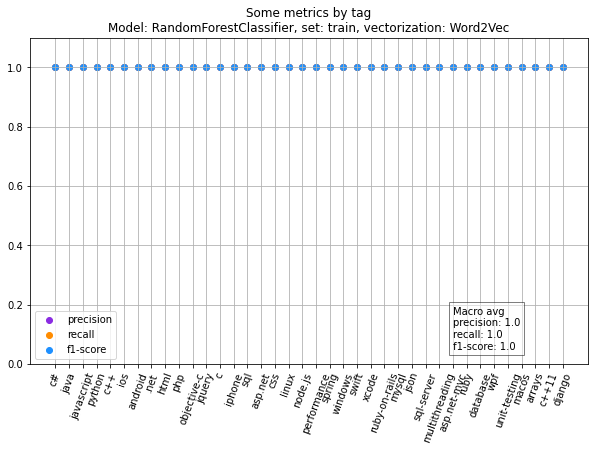

In [70]:
diplay_and_plot_report(y_train, y_pred_train, 'RandomForestClassifier', 'train','Word2Vec')

Classifier: RandomForestClassifier	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.64      0.12      0.21       467
          java       0.67      0.15      0.25       430
    javascript       0.71      0.22      0.34       409
        python       0.83      0.22      0.35       354
           c++       0.69      0.35      0.46       293
           ios       0.69      0.24      0.36       285
       android       0.92      0.20      0.32       249
          .net       0.64      0.04      0.07       239
          html       0.56      0.11      0.19       206
           php       1.00      0.01      0.01       164
   objective-c       0.42      0.03      0.06       147
        jquery       0.76      0.13      0.22       150
             c       0.54      0.05      0.10       131
        iphone       0.31      0.04      0.07       134
           sql       0.59      0.14    

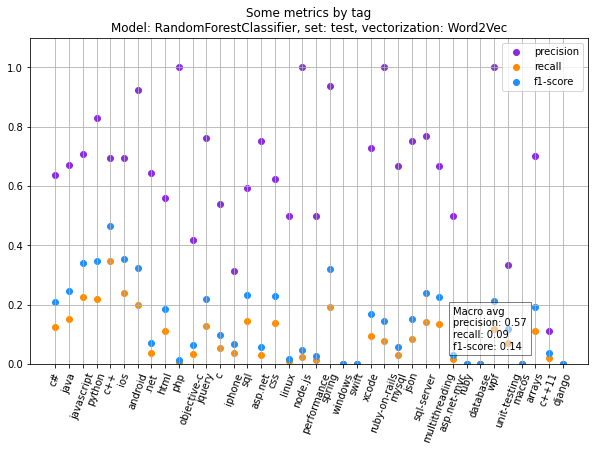

In [71]:
diplay_and_plot_report(y_test, y_pred_test, 'RandomForestClassifier', 'test','Word2Vec')

In [72]:
fpr, tpr, roc_auc = compute_roc_data(y_train,y_pred_train_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
1.00


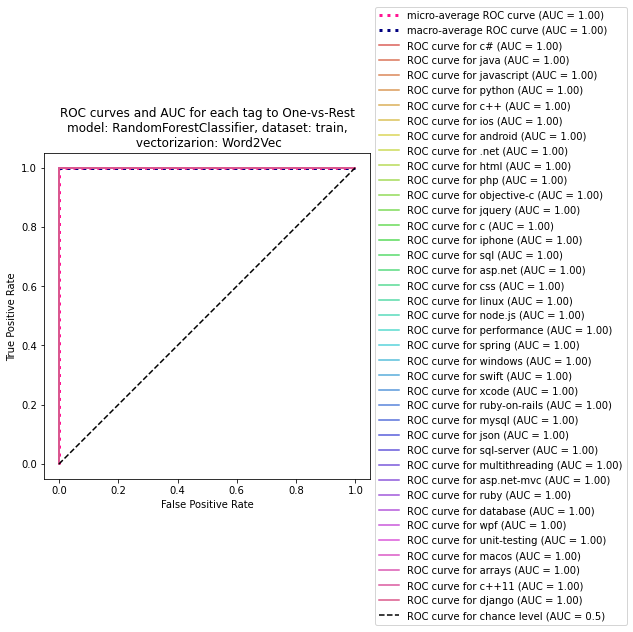

In [73]:
plot_roc_curves(
    fpr,tpr,roc_auc,'RandomForestClassifier', 'train','Word2Vec',y_train, y_pred_train_proba)

In [74]:
fpr, tpr, roc_auc = compute_roc_data(y_test,y_pred_test_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.86
Macro-averaged One-vs-Rest ROC AUC score:
0.82


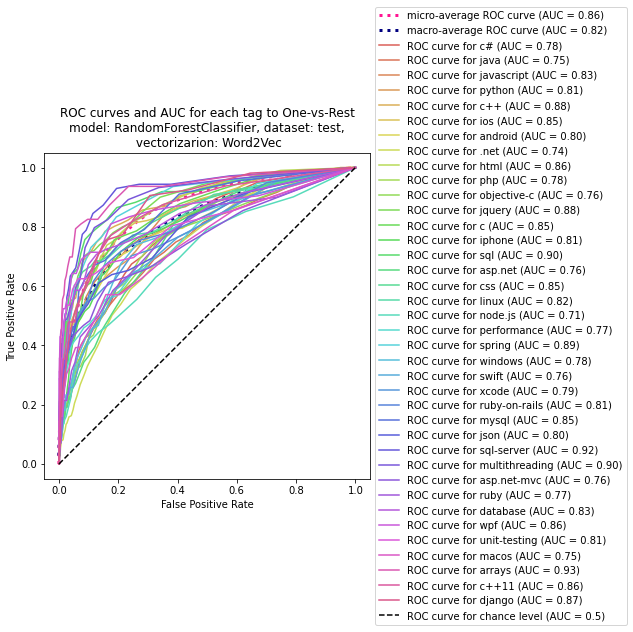

In [75]:
plot_roc_curves(
    fpr,tpr,roc_auc,'RandomForestClassifier', 'test','Word2Vec',y_test, y_pred_test_proba)

In [76]:
# Appending results for later compare
append_results(vectorization='Word2Vec',
               model='RandomForest', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

### Naive-Bayes classifier (TD-IDF)

This classifier does not take negative numbers as an argument for the feature matrix. We then scale the data with min-max scaler to have them between 0 and 1.

In [77]:
from sklearn.preprocessing import MinMaxScaler

X = embeddings

# Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Defining target vector
columns_tags = ['tag_'+tag for tag in tag_list]
y = df[columns_tags]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,y, test_size=0.33, random_state=5
)

We do a random search for the best hyper-parameters

In [78]:
parameters = {
    'estimator__alpha' : [0.05, 0.2, 0.5, 1],
    'estimator__fit_prior' : [True, False]
}

# Instantiating OneVsRest Classifier
cl = OneVsRestClassifier(MultinomialNB())

# Grid search for best hyperparameters
grid_search = GridSearchCV(
    estimator = cl,
    param_grid= parameters,
    scoring='roc_auc_ovr',
    verbose=2,
    n_jobs=-1
)

# Performing grid search
grid_search.fit(X_train, y_train)

# Instantiating Best OneVsRest Classifier
cl = grid_search.best_estimator_

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

# Print best parameters
print('The best parameters are:')
print(grid_search.best_params_)
print('The best score is:')
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
fit time: 0.6978194713592529 secs.
predict time: 0.5093441009521484 secs.
The best parameters are:
{'estimator__alpha': 0.05, 'estimator__fit_prior': True}
The best score is:
0.8790127550560582


In [79]:
# Choosing best threshold for classification
thresh = choose_best_thres(y_train, y_pred_train_proba)

# predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.1


#### Evaluation: NaiveBayes

Classifier: MultinomialNB	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.16      1.00      0.27      1012
          java       0.15      0.96      0.26       901
    javascript       0.26      0.82      0.39       769
        python       0.22      0.88      0.35       747
           c++       0.38      0.72      0.50       600
           ios       0.34      0.60      0.44       564
       android       0.36      0.53      0.43       507
          .net       0.29      0.26      0.27       526
          html       0.38      0.46      0.42       333
           php       0.38      0.03      0.05       313
   objective-c       0.30      0.16      0.21       292
        jquery       0.33      0.28      0.30       288
             c       0.43      0.21      0.28       240
        iphone       0.30      0.18      0.22       257
           sql       0.45      0.33      0.38  

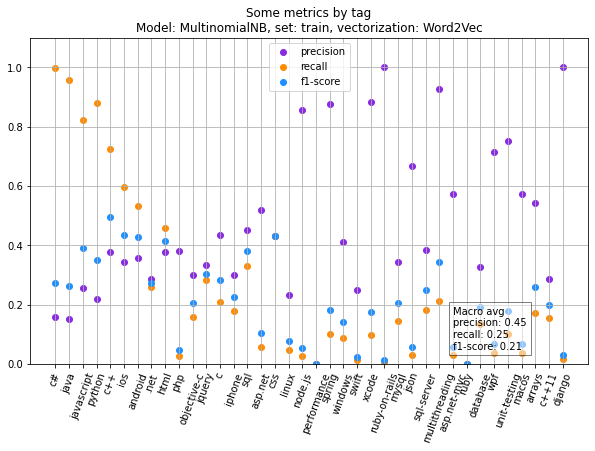

In [80]:
diplay_and_plot_report(y_train, y_pred_train, 'MultinomialNB', 'train','Word2Vec')

Classifier: MultinomialNB	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.15      1.00      0.26       467
          java       0.15      0.97      0.26       430
    javascript       0.27      0.85      0.41       409
        python       0.21      0.86      0.33       354
           c++       0.38      0.74      0.50       293
           ios       0.35      0.59      0.44       285
       android       0.33      0.47      0.38       249
          .net       0.27      0.24      0.26       239
          html       0.40      0.39      0.39       206
           php       0.25      0.01      0.01       164
   objective-c       0.25      0.13      0.17       147
        jquery       0.40      0.32      0.35       150
             c       0.35      0.19      0.25       131
        iphone       0.29      0.17      0.22       134
           sql       0.48      0.26      0.34   

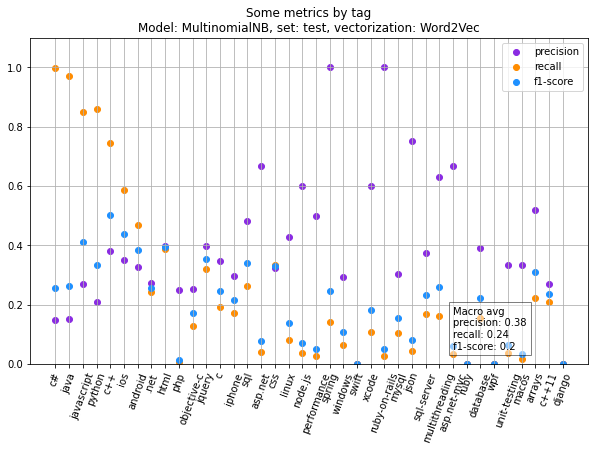

In [81]:
diplay_and_plot_report(y_test, y_pred_test, 'MultinomialNB', 'test','Word2Vec')

In [82]:
fpr, tpr, roc_auc = compute_roc_data(y_train,y_pred_train_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.86
Macro-averaged One-vs-Rest ROC AUC score:
0.89


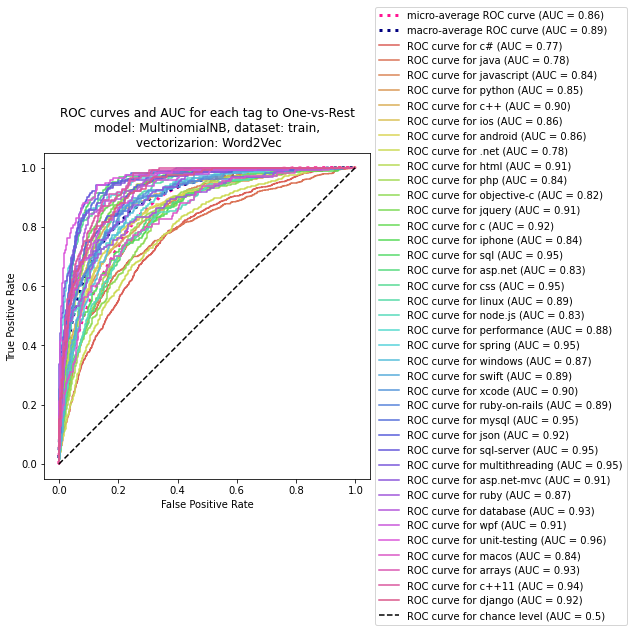

In [83]:
plot_roc_curves(
    fpr,tpr,roc_auc,'MultinomialNB', 'train','Word2Vec',y_train, y_pred_train_proba)

In [84]:
fpr, tpr, roc_auc = compute_roc_data(y_test,y_pred_test_proba, tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.86
Macro-averaged One-vs-Rest ROC AUC score:
0.88


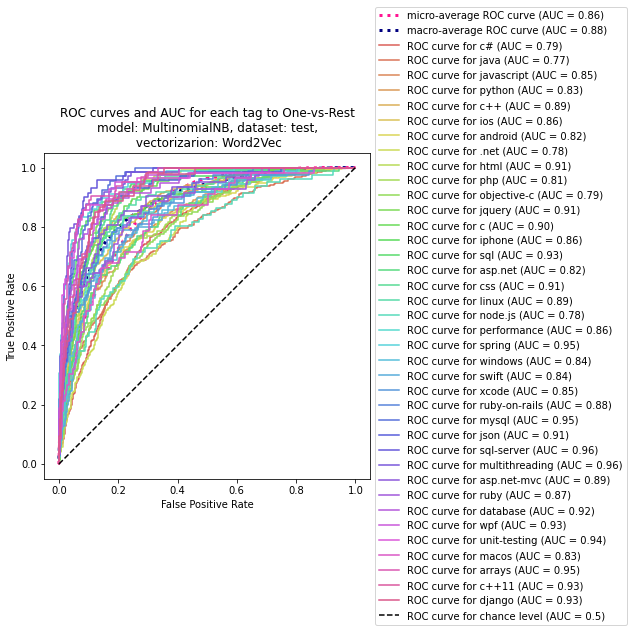

In [85]:
plot_roc_curves(
    fpr,tpr,roc_auc,'MultinomialNB', 'test','Word2Vec',y_test, y_pred_test_proba)

In [86]:
# Appending results for later compare
append_results(vectorization='Word2Vec',
               model='MultinomialNB', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

# BERT (Supervised)

In [88]:
# Checking available GPU (colab)
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  1
True


## Preparation fonctions

From the Tweets notebook provided.

In [89]:
# Function for preparing sentences

def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Feature creation function
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot # juste besoin du 1er

We now import and instantiate the BERT model.

In [90]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'

from transformers import AutoTokenizer, TFBertModel

model = TFBertModel.from_pretrained("bert-base-uncased")
sentences = df['processed_text'].to_list()

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



loading weights file tf_model.h5 from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tf_model.h5
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

In [91]:
# Feature creation
features_bert, last_hidden_states_tot = feature_BERT_fct(model, 
                                                         model_type, 
                                                         sentences, 
                                                         max_length, 
                                                         batch_size, 
                                                         mode='HF')

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_ac

1/1 [==============================] - 0s 24ms/step
temps traitement :  554.0


In [ ]:
# np.save('features_bert.npy', features_bert) # save
# feats_bert = np.load('features_bert.npy')  # load 

We obtain our feature matrix:

In [92]:
X = features_bert
print(f'Shape of feature matrix: {X.shape}')

# Defining target vector
columns_tags = ['tag_'+tag for tag in tag_list]
y = df[columns_tags]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=5
)

Shape of feature matrix: (10000, 768)


## Classification

### Logistic regression

In [ ]:
# # Hyperparameters for logistic regression
# parameters = {
#     'estimator__penalty' : ['l1', 'l2'],
#     'estimator__tol' : [1e-6, 1e-5, 1e-4, 1e-3],
#     'estimator__C' : [0.01,0.05 ,0.1, 0.5, 0.7, 1],
#     'estimator__fit_intercept' : [True, False],
#     'estimator__solver' : ['liblinear','sag', 'saga']
# }

# # Instantiating OneVsRest Classifier
# cl = OneVsRestClassifier(LogisticRegression())

# # Random search for best hyperparameters
# random_search = RandomizedSearchCV(
#     estimator = cl,
#     param_distributions= parameters,
#     n_iter=20,
#     scoring='roc_auc_ovr',
#     random_state=5,
#     n_jobs=-1
# )

# # Perform random search
# random_search.fit(X_train, y_train)

# # Instantiating BEST OneVsRest Classifier
# cl = random_search.best_estimator_

# # Fitting classifier
# start = time.time()
# cl.fit(X_train,y_train)
# finish = time.time()
# print(f'fit time: {finish - start} secs.')

# # Predicting (with probabilites)
# start = time.time()
# y_pred_train_proba = cl.predict_proba(X_train)
# finish = time.time()
# print(f'predict time: {finish - start} secs.')

# y_pred_test_proba = cl.predict_proba(X_test)

KeyboardInterrupt: ignored

In [ ]:
# Print best parameters
# print('The best parameters are:')
# print(random_search.best_params_)
# print('The best score is:')
# print(random_search.best_score_)

In [93]:
# Instantiating OneVsRest Classifier with best parameters found before
cl = OneVsRestClassifier(LogisticRegression(
    tol=1e-05,
    solver='saga',
    penalty='l2',
    fit_intercept=True,
    C=0.7
))

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

fit time: 291.2099144458771 secs.
predict time: 0.26367950439453125 secs.


In [94]:
thresh = choose_best_thres(y_train, y_pred_train_proba)

# Predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.2


#### Evaluation

Classifier: LogisticRegression	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.49      0.78      0.60      1012
          java       0.52      0.75      0.61       901
    javascript       0.53      0.78      0.63       769
        python       0.60      0.83      0.70       747
           c++       0.65      0.81      0.72       600
           ios       0.58      0.78      0.66       564
       android       0.63      0.79      0.70       507
          .net       0.43      0.59      0.50       526
          html       0.56      0.72      0.63       333
           php       0.66      0.70      0.68       313
   objective-c       0.52      0.62      0.56       292
        jquery       0.67      0.71      0.69       288
             c       0.57      0.72      0.64       240
        iphone       0.54      0.65      0.59       257
           sql       0.60      0.77      0

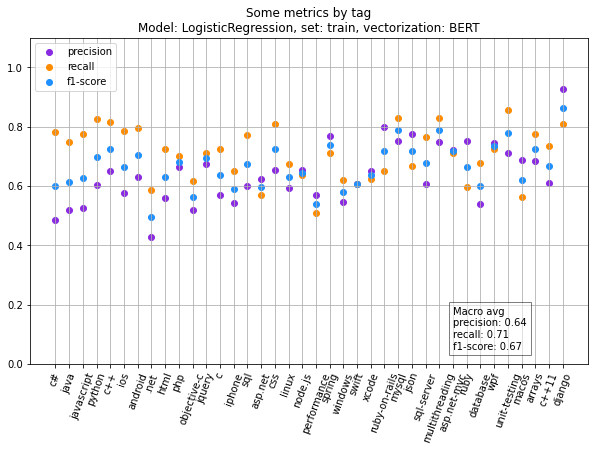

In [95]:
diplay_and_plot_report(y_train, 
                       y_pred_train, 
                       'LogisticRegression', 
                       'train',
                       'BERT')

Classifier: LogisticRegression	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.41      0.70      0.52       467
          java       0.43      0.68      0.52       430
    javascript       0.48      0.66      0.55       409
        python       0.47      0.63      0.54       354
           c++       0.54      0.71      0.61       293
           ios       0.47      0.67      0.55       285
       android       0.51      0.67      0.58       249
          .net       0.28      0.33      0.30       239
          html       0.46      0.49      0.47       206
           php       0.50      0.53      0.51       164
   objective-c       0.30      0.39      0.34       147
        jquery       0.56      0.59      0.57       150
             c       0.40      0.48      0.44       131
        iphone       0.33      0.43      0.37       134
           sql       0.55      0.59      0.

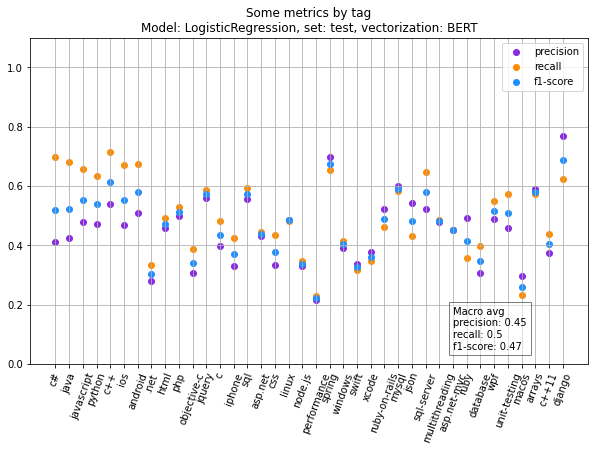

In [96]:
diplay_and_plot_report(y_test, 
                       y_pred_test, 
                       'LogisticRegression', 
                       'test',
                       'BERT')

In [97]:
fpr, tpr, roc_auc = compute_roc_data(y_train,
                                     y_pred_train_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.97
Macro-averaged One-vs-Rest ROC AUC score:
0.97


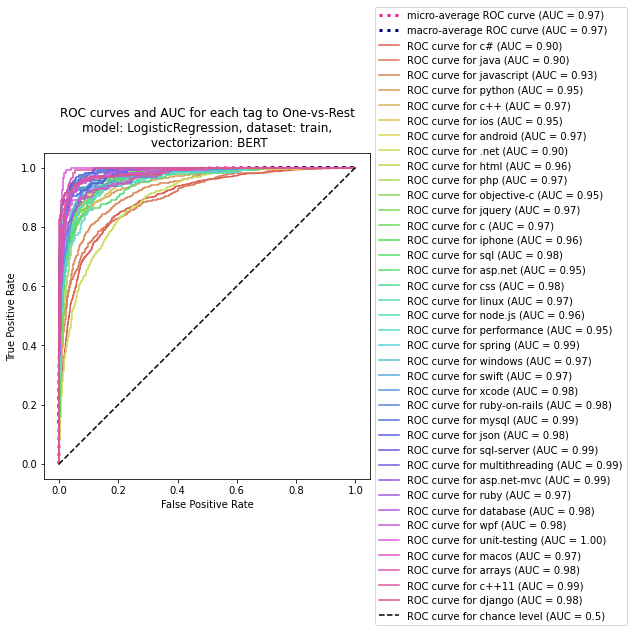

In [98]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'LogisticRegression', 
                'train',
                'BERT',
                y_train, 
                y_pred_train_proba)

In [99]:
fpr, tpr, roc_auc = compute_roc_data(y_test,
                                     y_pred_test_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.92
Macro-averaged One-vs-Rest ROC AUC score:
0.90


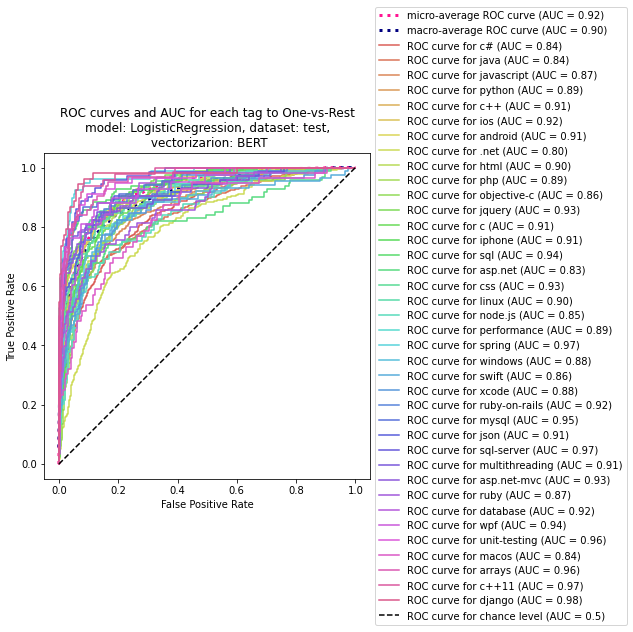

In [100]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'LogisticRegression', 
                'test',
                'BERT',
                y_test, 
                y_pred_test_proba)

In [101]:
# Appending results for later compare
append_results(vectorization='BERT',
               model='LogisticRegression', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

### RandomForest classifier

Again, we do not do cross validation since the computing times were not reasonable. (See the paragraph about this in RandomForest section of TF-IDF vectorisation, above).

In [102]:
# Instantiating OneVsRest Classifier default parameters
cl = OneVsRestClassifier(RandomForestClassifier())

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

fit time: 1068.1823856830597 secs.
predict time: 7.54841423034668 secs.


In [103]:
# choose threshold for maximal f1-score
thresh = choose_best_thres(y_train, y_pred_train_proba)

# predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.3


#### Evaluation: RandomForestCl

Classifier: RandomForestClassifier	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       1.00      1.00      1.00      1012
          java       1.00      1.00      1.00       901
    javascript       1.00      1.00      1.00       769
        python       1.00      1.00      1.00       747
           c++       1.00      1.00      1.00       600
           ios       1.00      1.00      1.00       564
       android       1.00      1.00      1.00       507
          .net       1.00      1.00      1.00       526
          html       1.00      1.00      1.00       333
           php       1.00      1.00      1.00       313
   objective-c       1.00      1.00      1.00       292
        jquery       1.00      1.00      1.00       288
             c       1.00      1.00      1.00       240
        iphone       1.00      1.00      1.00       257
           sql       1.00      1.00   

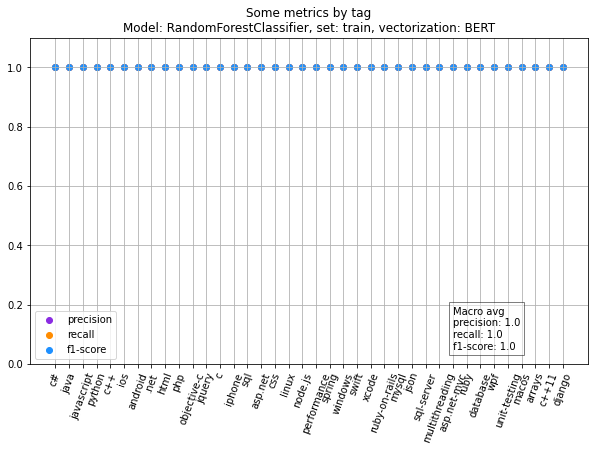

In [104]:
diplay_and_plot_report(y_train, 
                       y_pred_train, 
                       'RandomForestClassifier', 
                       'train',
                       'BERT')

Classifier: RandomForestClassifier	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.34      0.22      0.26       467
          java       0.40      0.14      0.21       430
    javascript       0.36      0.09      0.15       409
        python       0.38      0.18      0.24       354
           c++       0.57      0.31      0.41       293
           ios       0.45      0.26      0.33       285
       android       0.42      0.23      0.30       249
          .net       0.32      0.08      0.13       239
          html       0.44      0.07      0.12       206
           php       0.33      0.03      0.06       164
   objective-c       0.30      0.05      0.08       147
        jquery       0.50      0.01      0.01       150
             c       0.33      0.05      0.08       131
        iphone       0.31      0.09      0.14       134
           sql       0.63      0.11    

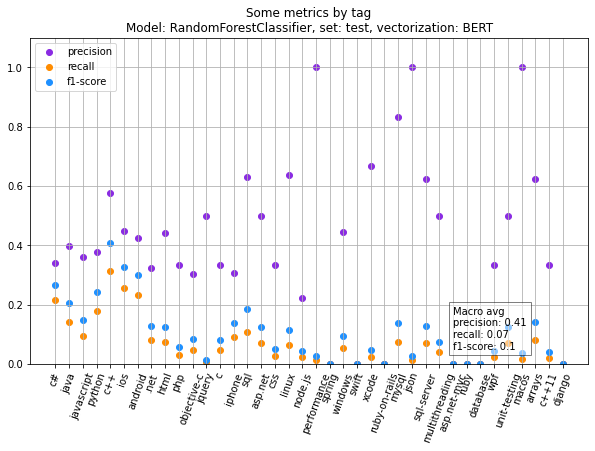

In [105]:
diplay_and_plot_report(y_test, 
                       y_pred_test, 
                       'RandomForestClassifier', 
                       'test',
                       'BERT')

In [106]:
fpr, tpr, roc_auc = compute_roc_data(y_train,
                                     y_pred_train_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
1.00


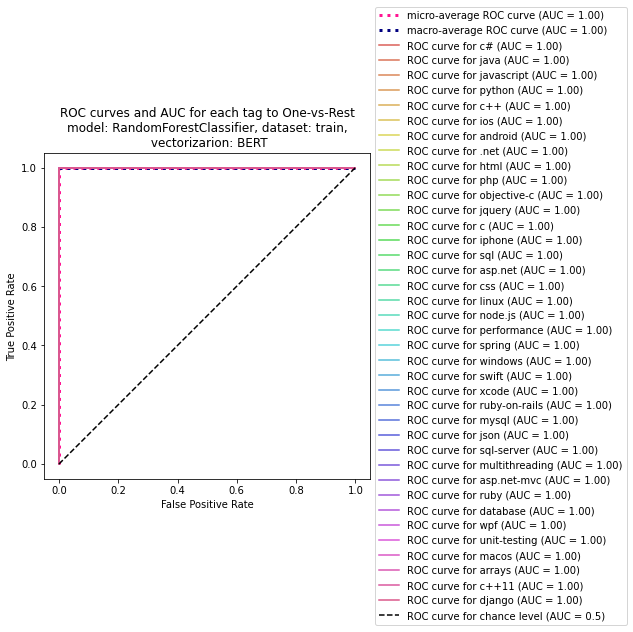

In [107]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'RandomForestClassifier', 
                'train',
                'BERT',
                y_train, 
                y_pred_train_proba)

In [108]:
fpr, tpr, roc_auc = compute_roc_data(y_test,
                                     y_pred_test_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.81
Macro-averaged One-vs-Rest ROC AUC score:
0.76


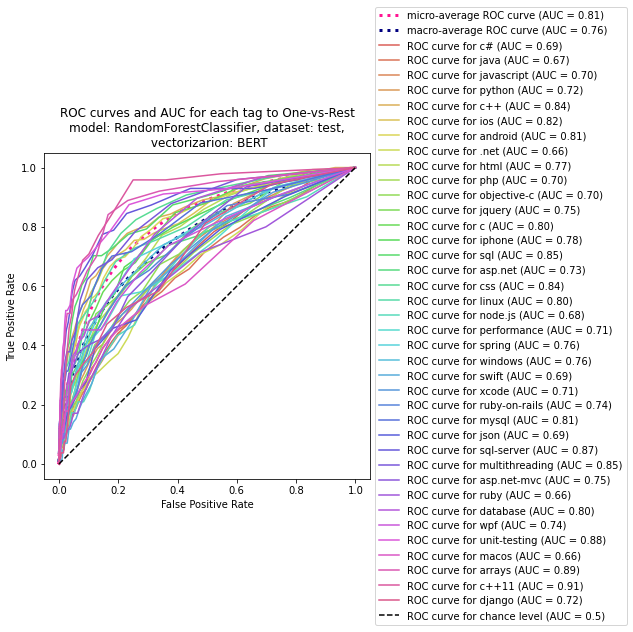

In [109]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'RandomForestClassifier', 
                'test',
                'BERT',
                y_test, 
                y_pred_test_proba)

In [110]:
# Appending results for later compare
append_results(vectorization='BERT',
               model='RandomForest', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

In [111]:
display(pd.DataFrame(classification_results))

Vectorization               Model  Macro. avg. f1-score  Macro. avg. AUC  \
0        TF-IDF  LogisticRegression                  0.55             0.95   
1        TF-IDF       MultinomialNB                  0.48             0.93   
2        TF-IDF      RandomForestCl                  0.30             0.92   
3      Word2Vec  LogisticRegression                  0.47             0.92   
4      Word2Vec        RandomForest                  0.14             0.82   
5      Word2Vec       MultinomialNB                  0.20             0.88   
6          BERT  LogisticRegression                  0.47             0.90   
7          BERT        RandomForest                  0.10             0.76   

   Fit time  
0      7.33  
1      0.11  
2    125.01  
3     20.98  
4    459.40  
5      0.70  
6    291.21  
7   1068.18

### Naive-Bayes classifier

This classifier does not take negative numbers as an argument for the feature matrix. We then scale the data with min-max scaler to have them between 0 and 1.

In [114]:
from sklearn.preprocessing import MinMaxScaler

X = features_bert

# Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Defining target vector
columns_tags = ['tag_'+tag for tag in tag_list]
y = df[columns_tags]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,y, test_size=0.33, random_state=5
)

In [115]:
parameters = {
    'estimator__alpha' : [0.05, 0.2, 0.5, 1],
    'estimator__fit_prior' : [True, False]
}

# Instantiating OneVsRest Classifier
cl = OneVsRestClassifier(MultinomialNB())

# Grid search for best hyperparameters
grid_search = GridSearchCV(
    estimator = cl,
    param_grid= parameters,
    scoring='roc_auc_ovr',
    verbose=2,
    n_jobs=-1
)

# Performing grid search
grid_search.fit(X_train, y_train)

# Instantiating Best OneVsRest Classifier
cl = grid_search.best_estimator_

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

# Print best parameters
print('The best parameters are:')
print(grid_search.best_params_)
print('The best score is:')
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
fit time: 1.7798950672149658 secs.
predict time: 0.9355814456939697 secs.
The best parameters are:
{'estimator__alpha': 0.05, 'estimator__fit_prior': True}
The best score is:
0.8126718840913613


In [116]:
# Choosing best threshold for classification
thresh = choose_best_thres(y_train, y_pred_train_proba)

# predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.1


Evaluation: NaiveBayes

Classifier: MultinomialNB	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.19      0.84      0.31      1012
          java       0.17      0.86      0.29       901
    javascript       0.17      0.71      0.28       769
        python       0.19      0.71      0.30       747
           c++       0.23      0.70      0.35       600
           ios       0.24      0.71      0.36       564
       android       0.23      0.73      0.35       507
          .net       0.14      0.48      0.22       526
          html       0.20      0.63      0.30       333
           php       0.37      0.24      0.29       313
   objective-c       0.16      0.52      0.24       292
        jquery       0.19      0.31      0.24       288
             c       0.17      0.52      0.25       240
        iphone       0.17      0.64      0.27       257
           sql       0.23      0.64      0.34  

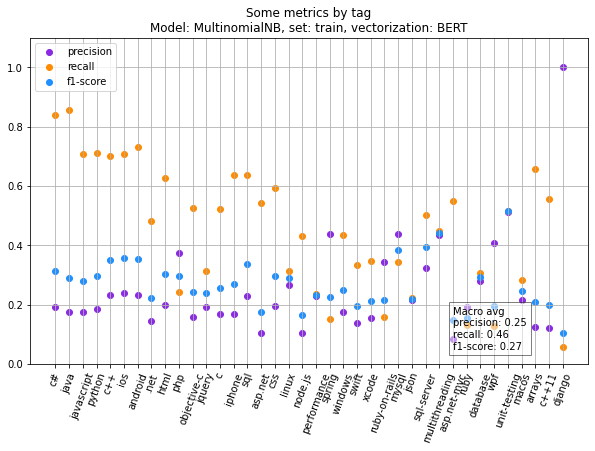

In [117]:
diplay_and_plot_report(y_train, 
                       y_pred_train, 
                       'MultinomialNB', 
                       'train',
                       'BERT')

Classifier: MultinomialNB	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.18      0.85      0.30       467
          java       0.16      0.86      0.28       430
    javascript       0.19      0.69      0.30       409
        python       0.16      0.67      0.26       354
           c++       0.25      0.73      0.37       293
           ios       0.25      0.73      0.37       285
       android       0.23      0.68      0.34       249
          .net       0.14      0.49      0.22       239
          html       0.21      0.51      0.30       206
           php       0.36      0.21      0.27       164
   objective-c       0.14      0.48      0.21       147
        jquery       0.23      0.35      0.28       150
             c       0.16      0.47      0.24       131
        iphone       0.18      0.62      0.27       134
           sql       0.23      0.59      0.33   

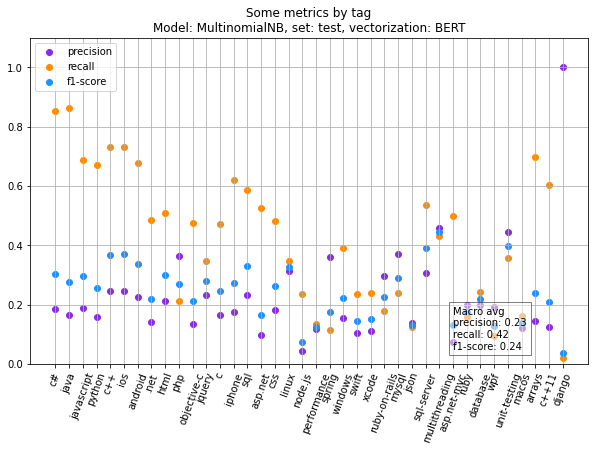

In [118]:
diplay_and_plot_report(y_test, 
                       y_pred_test, 
                       'MultinomialNB', 
                       'test',
                       'BERT')

In [119]:
fpr, tpr, roc_auc = compute_roc_data(y_train,
                                     y_pred_train_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.85
Macro-averaged One-vs-Rest ROC AUC score:
0.83


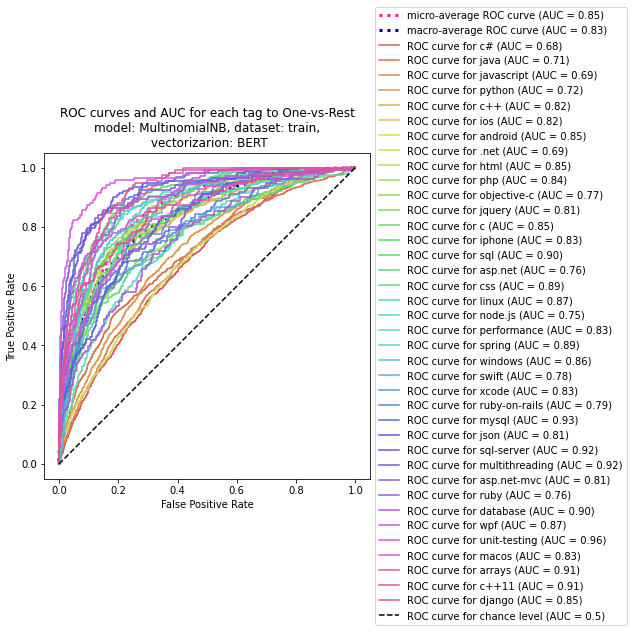

In [120]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'MultinomialNB', 
                'train',
                'BERT',
                y_train, 
                y_pred_train_proba)

In [121]:
fpr, tpr, roc_auc = compute_roc_data(y_test,
                                     y_pred_test_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.84
Macro-averaged One-vs-Rest ROC AUC score:
0.81


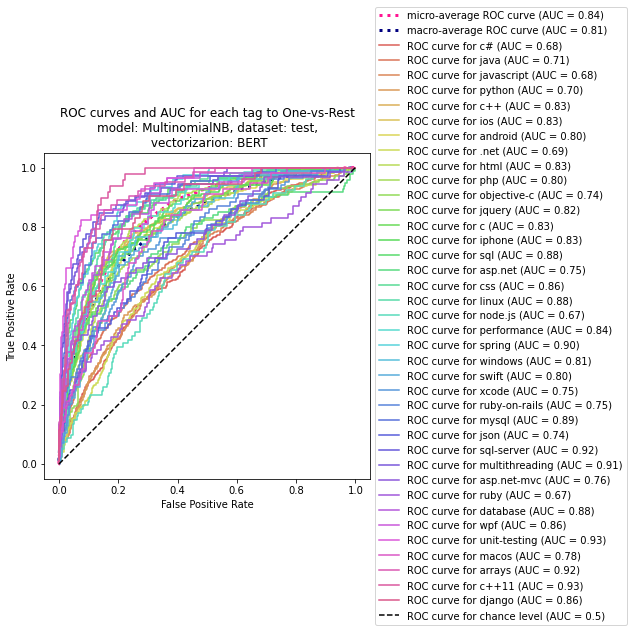

In [122]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'MultinomialNB', 
                'test',
                'BERT',
                y_test, 
                y_pred_test_proba)

In [123]:
# Appending results for later compare
append_results(vectorization='BERT',
               model='MultinomialNB', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

# USE (Supervised)

In [124]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [125]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [126]:
batch_size = 10
sentences = df['processed_text'].to_list()
features_USE = feature_USE_fct(sentences, batch_size)

We can now obtain our **feature matrix**:

In [127]:
X = features_USE
print(f'Shape of feature matrix: {X.shape}')

# Defining target vector
columns_tags = ['tag_'+tag for tag in tag_list]
y = df[columns_tags]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=5
)

Shape of feature matrix: (10000, 512)


## Classification

### Logistic Regression

In [128]:
# # Hyperparameters for logistic regression
# parameters = {
#     'estimator__penalty' : ['l1', 'l2'],
#     'estimator__tol' : [1e-6, 1e-5, 1e-4, 1e-3],
#     'estimator__C' : [0.01,0.05 ,0.1, 0.5, 0.7, 1],
#     'estimator__fit_intercept' : [True, False],
#     'estimator__solver' : ['liblinear','sag', 'saga']
# }

# # Instantiating OneVsRest Classifier
# cl = OneVsRestClassifier(LogisticRegression())

# # Random search for best hyperparameters
# random_search = RandomizedSearchCV(
#     estimator = cl,
#     param_distributions= parameters,
#     n_iter=20,
#     scoring='roc_auc_ovr',
#     random_state=5,
#     n_jobs=-1
# )

# # Perform random search
# random_search.fit(X_train, y_train)

# # Instantiating BEST OneVsRest Classifier
# cl = random_search.best_estimator_

# # Fitting classifier
# start = time.time()
# cl.fit(X_train,y_train)
# finish = time.time()
# fittime = finish - start
# print(f'fit time: {fittime} secs.')

# # Predicting (with probabilites)
# start = time.time()
# y_pred_train_proba = cl.predict_proba(X_train)
# finish = time.time()
# print(f'predict time: {finish - start} secs.')

# y_pred_test_proba = cl.predict_proba(X_test)

In [ ]:
# # Print best parameters
# print('The best parameters are:')
# print(random_search.best_params_)
# print('The best score is:')
# print(random_search.best_score_)

The best parameters are:
{'estimator__tol': 0.0001, 'estimator__solver': 'sag', 'estimator__penalty': 'l2', 'estimator__fit_intercept': True, 'estimator__C': 0.05}
The best score is:
0.9245329376227254


In [129]:
# Instantiating OneVsRest Classifier with BEST parameters found
cl = OneVsRestClassifier(LogisticRegression(
    tol=0.0001,
    solver='sag',
    penalty='l2',
    fit_intercept=True,
    C=0.05
))

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

fit time: 20.54269576072693 secs.
predict time: 0.09569549560546875 secs.


In [130]:
thresh = choose_best_thres(y_train, y_pred_train_proba)

# Predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.1


#### Evaluation: LogisticRegression

Classifier: LogisticRegression	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.25      0.99      0.41      1012
          java       0.23      0.98      0.37       901
    javascript       0.32      0.97      0.48       769
        python       0.36      0.97      0.53       747
           c++       0.37      0.92      0.53       600
           ios       0.39      0.95      0.56       564
       android       0.39      0.93      0.55       507
          .net       0.29      0.84      0.44       526
          html       0.41      0.74      0.53       333
           php       0.78      0.72      0.75       313
   objective-c       0.44      0.47      0.45       292
        jquery       0.54      0.71      0.62       288
             c       0.51      0.36      0.42       240
        iphone       0.45      0.32      0.38       257
           sql       0.83      0.30      0

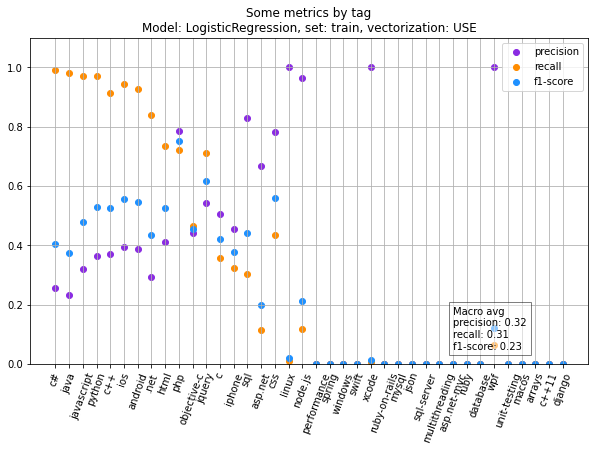

In [131]:
diplay_and_plot_report(y_train, 
                       y_pred_train, 
                       'LogisticRegression', 
                       'train', 
                       'USE')

Classifier: LogisticRegression	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.24      0.99      0.38       467
          java       0.23      0.99      0.37       430
    javascript       0.34      0.98      0.51       409
        python       0.33      0.96      0.50       354
           c++       0.35      0.92      0.51       293
           ios       0.39      0.95      0.55       285
       android       0.38      0.93      0.54       249
          .net       0.27      0.79      0.41       239
          html       0.46      0.72      0.56       206
           php       0.81      0.73      0.77       164
   objective-c       0.37      0.44      0.40       147
        jquery       0.56      0.75      0.64       150
             c       0.41      0.31      0.35       131
        iphone       0.49      0.37      0.42       134
           sql       0.68      0.14      0.

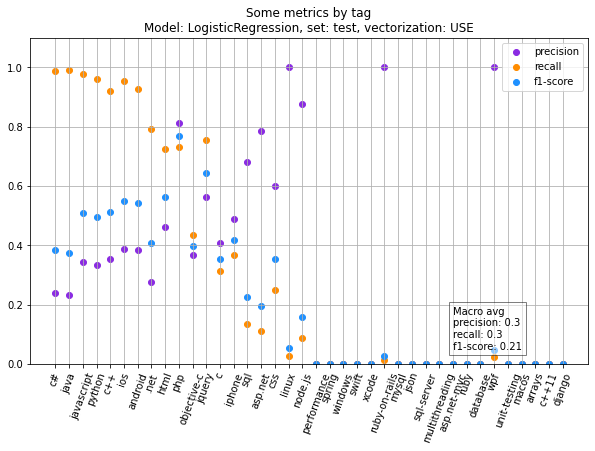

In [132]:
diplay_and_plot_report(y_test, 
                       y_pred_test, 
                       'LogisticRegression', 
                       'test',
                       'USE')

In [133]:
fpr, tpr, roc_auc = compute_roc_data(y_train,
                                     y_pred_train_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.91
Macro-averaged One-vs-Rest ROC AUC score:
0.96


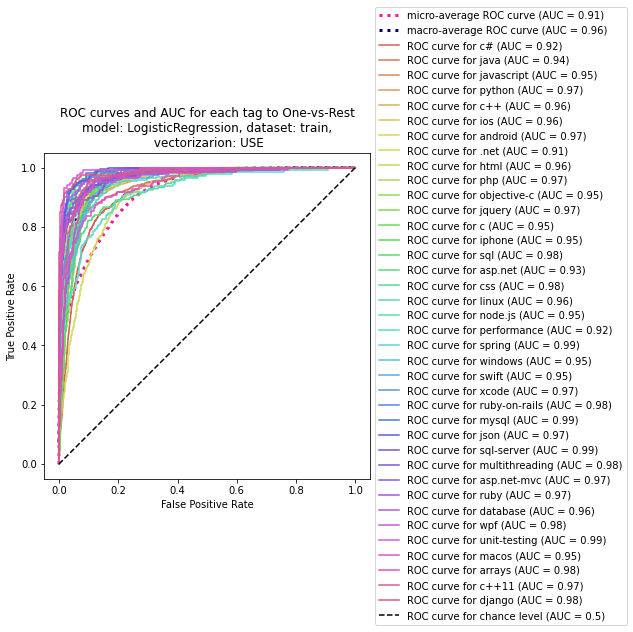

In [134]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'LogisticRegression', 
                'train',
                'USE',
                y_train, 
                y_pred_train_proba)

In [135]:
fpr, tpr, roc_auc = compute_roc_data(y_test,
                                     y_pred_test_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.91
Macro-averaged One-vs-Rest ROC AUC score:
0.96


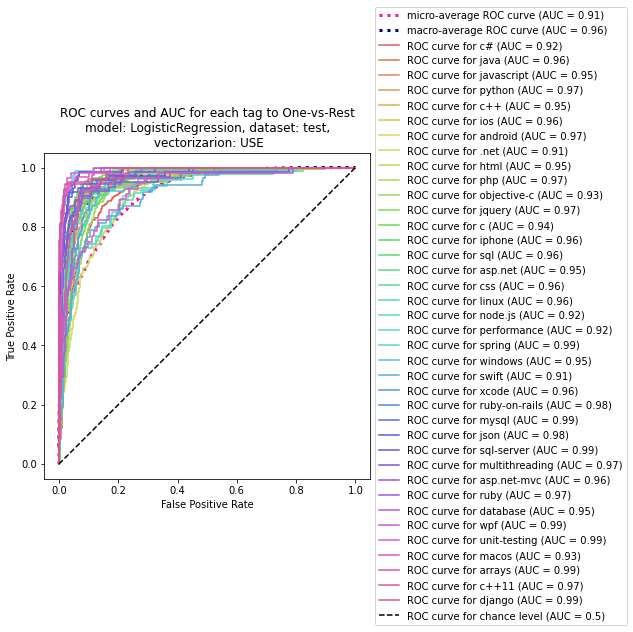

In [136]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'LogisticRegression', 
                'test',
                'USE',
                y_test, 
                y_pred_test_proba)

In [137]:
# Appending results for later compare
append_results(vectorization='USE',
               model='LogisticRegression', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

### RandomForest

Again, we do not do cross validation since the computing times were not reasonable. (See the paragraph about this in RandomForest section of TF-IDF vectorisation, above).

In [138]:
# Instantiating OneVsRest Classifier default parameters
cl = OneVsRestClassifier(RandomForestClassifier())

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

fit time: 490.6137444972992 secs.
predict time: 3.2757580280303955 secs.


In [139]:
# choose threshold for maximal f1-score
thresh = choose_best_thres(y_train, y_pred_train_proba)

# predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.4


#### Evaluation: RandomForestClassifier

Classifier: RandomForestClassifier	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       1.00      1.00      1.00      1012
          java       1.00      1.00      1.00       901
    javascript       1.00      1.00      1.00       769
        python       1.00      1.00      1.00       747
           c++       1.00      1.00      1.00       600
           ios       1.00      1.00      1.00       564
       android       1.00      1.00      1.00       507
          .net       1.00      1.00      1.00       526
          html       1.00      1.00      1.00       333
           php       1.00      1.00      1.00       313
   objective-c       1.00      1.00      1.00       292
        jquery       1.00      1.00      1.00       288
             c       1.00      1.00      1.00       240
        iphone       1.00      1.00      1.00       257
           sql       1.00      1.00   

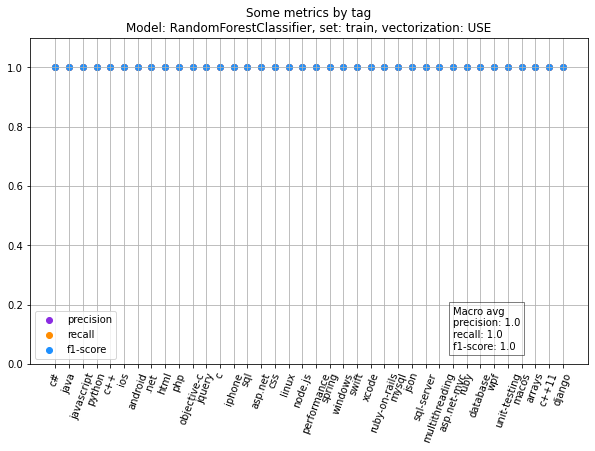

In [140]:
diplay_and_plot_report(y_train, 
                       y_pred_train, 
                       'RandomForestClassifier', 
                       'train',
                       'USE')

Classifier: RandomForestClassifier	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.70      0.54      0.61       467
          java       0.89      0.65      0.75       430
    javascript       0.74      0.60      0.66       409
        python       0.92      0.62      0.75       354
           c++       0.80      0.55      0.65       293
           ios       0.74      0.63      0.68       285
       android       0.97      0.62      0.76       249
          .net       0.58      0.13      0.22       239
          html       0.62      0.24      0.34       206
           php       0.91      0.57      0.70       164
   objective-c       0.52      0.16      0.24       147
        jquery       0.84      0.37      0.52       150
             c       0.71      0.08      0.14       131
        iphone       0.54      0.11      0.19       134
           sql       0.64      0.26    

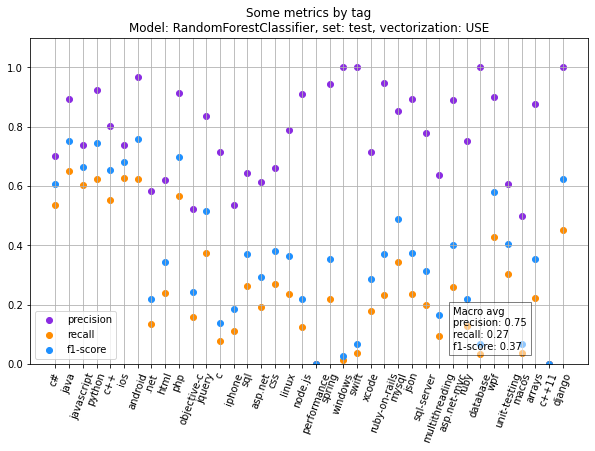

In [141]:
diplay_and_plot_report(y_test, 
                       y_pred_test, 
                       'RandomForestClassifier', 
                       'test',
                       'USE')

In [142]:
fpr, tpr, roc_auc = compute_roc_data(y_train,
                                     y_pred_train_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
1.00


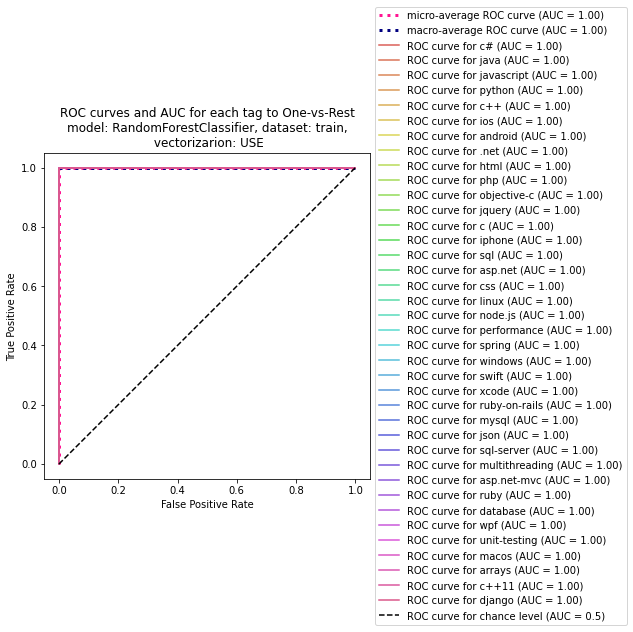

In [143]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'RandomForestClassifier', 
                'train',
                'USE',
                y_train, 
                y_pred_train_proba)

In [144]:
fpr, tpr, roc_auc = compute_roc_data(y_test,
                                     y_pred_test_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.95
Macro-averaged One-vs-Rest ROC AUC score:
0.94


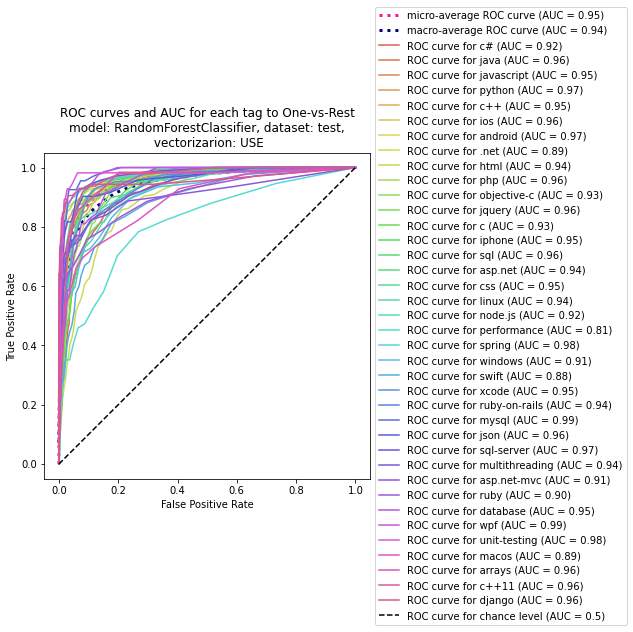

In [145]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'RandomForestClassifier', 
                'test',
                'USE',
                y_test, 
                y_pred_test_proba)

In [146]:
# Appending results for later compare
append_results(vectorization='USE',
               model='RandomForest', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

### Naive-Bayes classifier

This classifier does not take negative numbers as an argument for the feature matrix. We then scale the data with min-max scaler to have them between 0 and 1.

In [147]:
from sklearn.preprocessing import MinMaxScaler

X = features_USE

# Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Defining target vector
columns_tags = ['tag_'+tag for tag in tag_list]
y = df[columns_tags]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,y, test_size=0.33, random_state=5
)

We now do a random search for the best parameters

In [148]:
parameters = {
    'estimator__alpha' : [0.05, 0.2, 0.5, 1],
    'estimator__fit_prior' : [True, False]
}

# Instantiating OneVsRest Classifier
cl = OneVsRestClassifier(MultinomialNB())

# Grid search for best hyperparameters
grid_search = GridSearchCV(
    estimator = cl,
    param_grid= parameters,
    scoring='roc_auc_ovr',
    verbose=2,
    n_jobs=-1
)

# Performing grid search
grid_search.fit(X_train, y_train)

# Instantiating Best OneVsRest Classifier
cl = grid_search.best_estimator_

# Fitting classifier
start = time.time()
cl.fit(X_train,y_train)
finish = time.time()
fittime = finish - start
print(f'fit time: {fittime} secs.')

# Predicting (with probabilites)
start = time.time()
y_pred_train_proba = cl.predict_proba(X_train)
finish = time.time()
print(f'predict time: {finish - start} secs.')

y_pred_test_proba = cl.predict_proba(X_test)

# Print best parameters
print('The best parameters are:')
print(grid_search.best_params_)
print('The best score is:')
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
fit time: 0.5923705101013184 secs.
predict time: 0.46100521087646484 secs.
The best parameters are:
{'estimator__alpha': 1, 'estimator__fit_prior': True}
The best score is:
0.9541124932376622


In [149]:
# Choosing best threshold for classification
thresh = choose_best_thres(y_train, y_pred_train_proba)

# predictions based on threshold
y_pred_train = (y_pred_train_proba > thresh).astype(int)
y_pred_test = (y_pred_test_proba > thresh).astype(int)

Threshold that maximizes f1-score: 0.5


#### Evaluation: NaiveBayes

Classifier: MultinomialNB	Dataset: train
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.64      0.57      0.61      1012
          java       0.86      0.52      0.65       901
    javascript       0.64      0.69      0.66       769
        python       0.92      0.72      0.81       747
           c++       0.63      0.72      0.67       600
           ios       0.61      0.70      0.66       564
       android       0.66      0.73      0.69       507
          .net       0.44      0.44      0.44       526
          html       0.43      0.66      0.52       333
           php       0.78      0.68      0.73       313
   objective-c       0.37      0.56      0.45       292
        jquery       0.50      0.73      0.59       288
             c       0.33      0.68      0.44       240
        iphone       0.34      0.61      0.44       257
           sql       0.45      0.80      0.57  

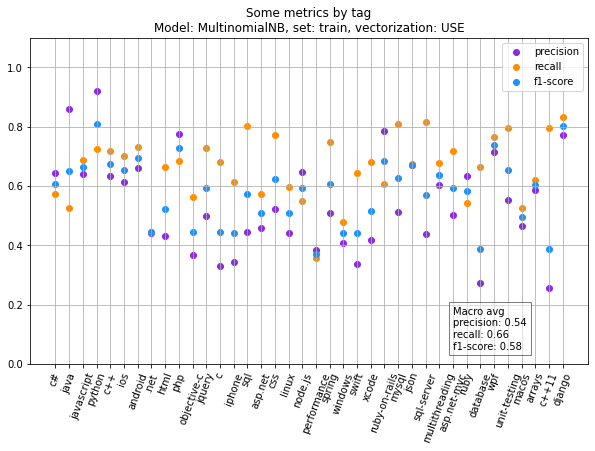

In [150]:
diplay_and_plot_report(y_train, 
                       y_pred_train, 
                       'MultinomialNB', 
                       'train',
                       'USE')

Classifier: MultinomialNB	Dataset: test
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.66      0.55      0.60       467
          java       0.86      0.57      0.69       430
    javascript       0.66      0.68      0.67       409
        python       0.89      0.66      0.76       354
           c++       0.58      0.68      0.63       293
           ios       0.57      0.70      0.63       285
       android       0.66      0.71      0.68       249
          .net       0.44      0.39      0.42       239
          html       0.48      0.66      0.56       206
           php       0.79      0.71      0.75       164
   objective-c       0.33      0.52      0.40       147
        jquery       0.51      0.77      0.61       150
             c       0.32      0.66      0.43       131
        iphone       0.39      0.72      0.51       134
           sql       0.46      0.73      0.56   

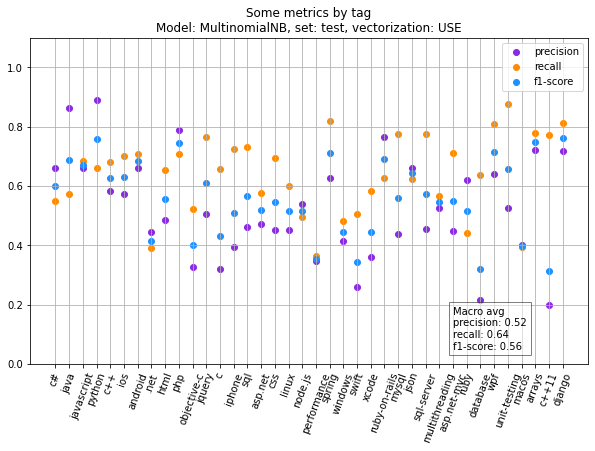

In [151]:
diplay_and_plot_report(y_test, 
                       y_pred_test, 
                       'MultinomialNB', 
                       'test',
                       'USE')

In [152]:
fpr, tpr, roc_auc = compute_roc_data(y_train,
                                     y_pred_train_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.96
Macro-averaged One-vs-Rest ROC AUC score:
0.96


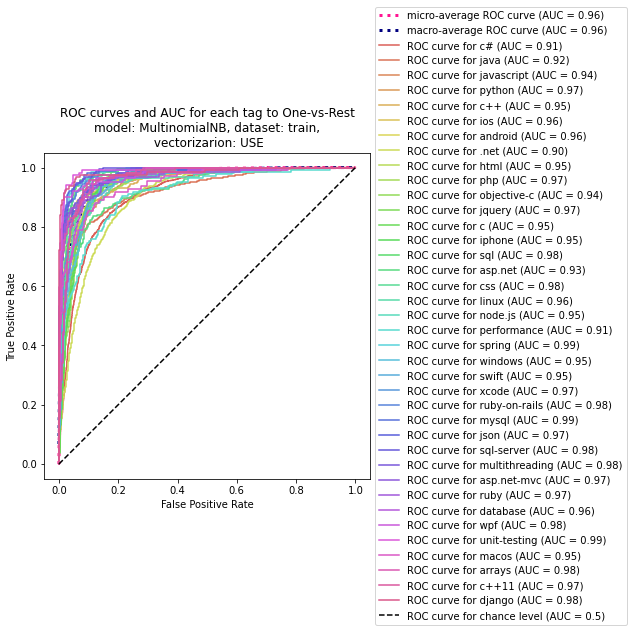

In [153]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'MultinomialNB', 
                'train',
                'USE',
                y_train, 
                y_pred_train_proba)

In [154]:
fpr, tpr, roc_auc = compute_roc_data(y_test,
                                     y_pred_test_proba, 
                                     tag_list)

Micro-averaged One-vs-Rest ROC AUC score:
0.96
Macro-averaged One-vs-Rest ROC AUC score:
0.96


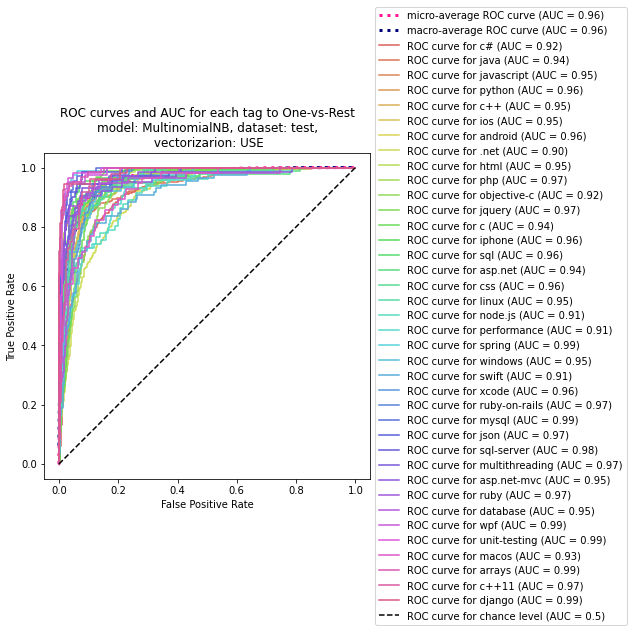

In [155]:
plot_roc_curves(fpr,
                tpr,
                roc_auc,
                'MultinomialNB', 
                'test',
                'USE',
                y_test, 
                y_pred_test_proba)

In [156]:
# Appending results for later compare
append_results(vectorization='USE',
               model='MultinomialNB', 
               f1=f1_sco, 
               auc=roc_auc_res,
               fittime=fittime)

# Comparing supervised models

In [157]:
cl_results_df = pd.DataFrame(classification_results)
cl_results_df.to_csv('classification_results.csv')
display(cl_results_df)

Vectorization               Model  Macro. avg. f1-score  Macro. avg. AUC  \
0         TF-IDF  LogisticRegression                  0.55             0.95   
1         TF-IDF       MultinomialNB                  0.48             0.93   
2         TF-IDF      RandomForestCl                  0.30             0.92   
3       Word2Vec  LogisticRegression                  0.47             0.92   
4       Word2Vec        RandomForest                  0.14             0.82   
5       Word2Vec       MultinomialNB                  0.20             0.88   
6           BERT  LogisticRegression                  0.47             0.90   
7           BERT        RandomForest                  0.10             0.76   
8           BERT       MultinomialNB                  0.24             0.81   
9            USE  LogisticRegression                  0.21             0.96   
10           USE        RandomForest                  0.37             0.94   
11           USE       MultinomialNB                  0.56             0.96   

    Fit time  
0       7.33  
1       0.11  
2     125.01  
3      20.98  
4     459.40  
5       0.70  
6     291.21  
7    1068.18  
8       1.78  
9      20.54  
10    490.61  
11      0.59

In [158]:
import plotly.express as px

fig = px.scatter(cl_results_df,
                 x='Macro. avg. AUC',
                 y='Macro. avg. f1-score',
                 hover_data=['Macro. avg. AUC',
                             'Macro. avg. f1-score',
                             'Vectorization',
                             'Model',
                             'Fit time'])
fig.show()

# LDA (Non-supervised)

For the topic prediction with the Latent Dirichlet Allocation model, we need to first convert the documents into document-term matrix. We choose to use TF-IDF form.

In [159]:
# Instantiate the tf-idf vectorizer
tfidf = TfidfVectorizer(max_df=0.75,
                        min_df=0.001)
# Vectorize the processed text
X_tfidf = tfidf.fit_transform(df.processed_text)
print(f'Shape of tf-idf document-term matrix: {X_tfidf.shape}')


Shape of tf-idf document-term matrix: (10000, 2592)


As phrased in the [scikit-learn user guide](https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation) for Latent Dirichlet Allocation:

>  LDA is a generative probabilistic model for collections of discrete dataset such as text corpora. It is also a topic model that is used for discovering abstract topics from a collection of documents.

With this scikit-learn implementation of LDA, we are then going to obtain a classification of our texts into topics. Concretely, we chose the number of different topics (this is an hyperparameter), the trained model will provide a **"topic-term" matrix** and a **"document-topic" matrix** can be calculated using its `transform` method.

We think that this model does not fit our main purpose which is more a multilabel classification. There are two main reasons for this opinion: one is that, in practice, we have many different tags (in our computation we have around 40 but in a sample of 50 000 documents we can have 18 000 different tags), and as we will see in the hyperparameter search, the optimal number of topics (`n_components`) is very low (between 5 and 10) compared to the number of tags (here 40). The second reason is that LDA seem to provide and be optimal for a **disjoint** set of topics, whereas in our purpose of tag suggestion, there are many tag that intersect. 

Take for example the tags **windows**, **linux**, and **python**. There are many questions that will be tagged with either **windows** and **python**, or either **linux** and **python**, or even the three of them. So to our eyes, it does not makes sense to try to find a disjoint union of topics within our documents.

For these reasons, this model is not chosen as the main model for tag suggestion. However, since for this project it was specifically asked to use LDA, we compute and search for the best hyperparameters and find what are the general topics. To each of the topics found by the model we suggest a list of tags associated to the topic.


In [ ]:
# Search for best hyperparameter n_components
param_results = param_search_LDA(X_tfidf, 3, 25)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
# Results of search
param_results

Silhouette score  Calinski-Harabasz score
n_components                                           
3                         0.65             25933.217102
4                         0.67             21307.874323
5                         0.69             18938.433082
6                         0.66             13517.701852
7                         0.64             10699.970264
8                         0.67             10937.396297
9                         0.65              8758.816113
10                        0.63              7444.243799
11                        0.63              6796.782765
12                        0.60              5421.253699
13                        0.57              4723.498216
14                        0.57              4283.334751
15                        0.56              3853.800891
16                        0.56              3637.281578
17                        0.53              3051.249811
18                        0.54              3047.067533
19                        0.54              2840.794702
20                        0.52              2546.675213
21                        0.51              2292.764562
22                        0.52              2305.657727
23                        0.51              2226.640486
24                        0.51              2088.129488

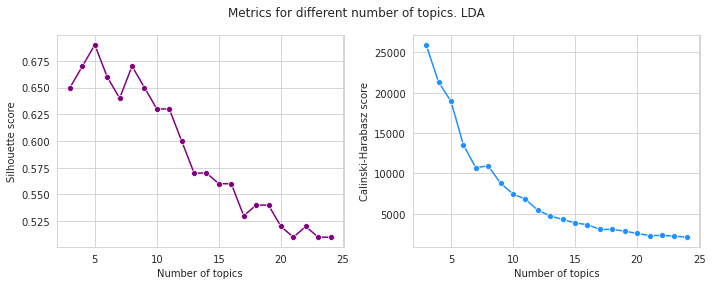

In [ ]:
# Plotting two different metrics
plot_LDA_scores(param_results)

We can see that following the silhouette score, the optimal number of topics is between 4 and 10. We choose one of the local maxima: 8. We train the model and visualize the topics

In [ ]:
# fitting LDA
lda_tfidf = LatentDirichletAllocation(n_components=8, 
                                      random_state=0)
lda_tfidf.fit(X_tfidf)

LatentDirichletAllocation(n_components=8, random_state=0)

Visualizing the models with pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tfidf, X_tfidf, tfidf, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4     -67.527710 -20.932680       1        1  23.354909
3      60.714676  80.524353       2        1  21.730955
7      59.753960 -50.720501       3        1  16.300189
6     -11.284865 -67.469063       4        1  15.490017
0      92.299118  14.633371       5        1   8.610744
5       7.827549  15.056551       6        1   6.546598
1     -10.549524  96.772018       7        1   4.571028
2     -68.608459  52.202820       8        1   3.395561, topic_info=                Term        Freq       Total Category  logprob  loglift
2195          string  138.000000  138.000000  Default  30.0000  30.0000
722            email   54.000000   54.000000  Default  29.0000  29.0000
111            array  108.000000  108.000000  Default  28.0000  28.0000
1966             row   67.000000   67.000000  Default  27.0000  27.0000
377           column   78.000000   78.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
151   authentication    7.883379   28.309377   Topic8  -5.1782   2.1043
1029           https    8.208627   41.171917   Topic8  -5.1378   1.7701
662           django    7.303895   50.285011   Topic8  -5.2545   1.4534
13           account    6.934812   23.483335   Topic8  -5.3064   2.1630
2147             sql    7.176424   78.822699   Topic8  -5.2721   0.9863

[552 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7         1  0.140429   access
7         2  0.191494   access
7         3  0.140429   access
7         4  0.382989   access
7         5  0.076598   access
...     ...       ...      ...
2586      5  0.772345  youtube
2589      2  0.826573      zip
2589      6  0.075143      zip
2590      6  0.885523     zone
2591      1  0.898893     zoom

[1519 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 8, 7, 1, 6, 2, 3])

To these different 8 topics we can try to assign some of our official tags (found in the list `tag_list`) by **intersecting** the most popular 30 words with the list of tags.

In [ ]:
# Creating list of 30 most popular words per topic
words_topic = {}
for index,topic in enumerate(lda_tfidf.components_):
    words_topic[index] = [tfidf.get_feature_names()[i] for i in topic.argsort()[-30:]]

# Intersect this list with our tag official tag list
topics_tags = {}
for topic in words_topic:
    topics_tags[topic] = list(set(words_topic[topic]).intersection(tag_list))

for key,value in topics_tags.items():
    print(f'Topic # {key}, Tags: {value}')

# Counting empty tag set
number_empty_tag_topic = 0
for key,value in topics_tags.items():
    if len(value) == 0:
        number_empty_tag_topic += 1

print(f'The # of topics with empty intersection with tags: {number_empty_tag_topic}')


Topic # 0, Tags: ['ios', 'jquery', 'android', 'xcode', 'javascript']
Topic # 1, Tags: ['python']
Topic # 2, Tags: ['sql', 'django']
Topic # 3, Tags: ['linux', 'windows', 'python']
Topic # 4, Tags: ['html', 'css']
Topic # 5, Tags: ['java', 'python']
Topic # 6, Tags: ['spring', 'json']
Topic # 7, Tags: ['mysql', 'sql', 'database']
The # of topics with empty intersection with tags: 0


We implement this script in a function to optimize again the number of topics: since the topics intersect, silhouette score was not found to be the best way to evaluate the search for best hyperparameters. We do a new search for best hyperparameters by retraining an LDA model with different values for `n_components` (number of topics) and looking at the previous list of **"predicted tags"**. To optimize this we would like **the greatest `n_components` such that this tag list is not empty**.

In [ ]:
# Searching for best hyperparameters
count_results = count_empty_LDA(X_tfidf, 3, 25)
count_results

3
Topic # 0, Tags: ['html', 'jquery', 'android', 'javascript']
Topic # 1, Tags: ['java', 'python']
Topic # 2, Tags: ['windows', 'sql', 'database', 'python']
4
Topic # 0, Tags: ['ios', 'css', 'html', 'jquery', 'android', 'javascript']
Topic # 1, Tags: ['java']
Topic # 2, Tags: ['mysql', 'sql', 'database', 'django']
Topic # 3, Tags: ['linux', 'java', 'windows', 'python']
5
Topic # 0, Tags: ['spring', 'android', 'json']
Topic # 1, Tags: ['sql']
Topic # 2, Tags: ['sql', 'database', 'python', 'php', 'django']
Topic # 3, Tags: ['linux', 'java', 'windows', 'python']
Topic # 4, Tags: ['html']
6
Topic # 0, Tags: ['spring', 'json']
Topic # 1, Tags: []
Topic # 2, Tags: ['mysql', 'sql', 'database', 'python', 'django']
Topic # 3, Tags: ['linux', 'windows', 'python']
Topic # 4, Tags: []
Topic # 5, Tags: ['android']
7
Topic # 0, Tags: ['javascript', 'html', 'jquery', 'ios', 'css']
Topic # 1, Tags: ['python']
Topic # 2, Tags: ['mysql', 'sql', 'database', 'django']
Topic # 3, Tags: ['linux', 'windows',

n_empty_tag_topic
n_components                   
3                             0
4                             0
5                             0
6                             2
7                             0
8                             0
9                             2
10                            1
11                            0
12                            1
13                            1
14                            1
15                            2
16                            5
17                            5
18                            5
19                            6
20                            5
21                            3
22                            5
23                            6
24                            8

In [ ]:
# fitting LDA with best n_components
lda_tfidf = LatentDirichletAllocation(n_components=11, 
                                      random_state=0)
lda_tfidf.fit(X_tfidf)

LatentDirichletAllocation(n_components=11, random_state=0)

In [ ]:
# Visualizing topics with pyLDAvis and tsne
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tfidf, X_tfidf, tfidf, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4       77.440948 -146.933777       1        1  19.969088
9      -94.899590   98.618835       2        1  16.805912
6      122.013283   66.161255       3        1  13.029187
7       40.733746    3.107882       4        1  12.106730
0     -161.103149   -1.025454       5        1  11.841836
3       -3.850013  -82.155006       6        1  11.452175
10     130.059723  -52.140007       7        1   3.996691
2     -114.325470 -100.121780       8        1   3.358257
5      -56.600273    1.506128       9        1   3.008373
8       13.583537  107.004311      10        1   2.358400
1      -37.318520 -180.831863      11        1   2.073351, topic_info=            Term        Freq       Total Category  logprob  loglift
840         file  266.000000  266.000000  Default  30.0000  30.0000
628   difference   73.000000   73.000000  Default  29.0000  29.0000
2261       table   95.000000   95.000000  Default  28.0000  28.0000
534    dataframe   37.000000   37.000000  Default  27.0000  27.0000
2536     windows   75.000000   75.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
962        group    5.301878   30.153768  Topic11  -5.0816   2.1378
1197    jsfiddle    4.244215   15.193132  Topic11  -5.3041   2.6007
51         alert    3.805142   13.013790  Topic11  -5.4133   2.6463
256       button    4.658352   73.706483  Topic11  -5.2110   1.1146
348        close    3.750461   22.826824  Topic11  -5.4278   2.0699

[708 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
7         1  0.076958  access
7         2  0.205221  access
7         3  0.307831  access
7         4  0.089784  access
7         5  0.102610  access
...     ...       ...     ...
2576      3  0.854068     xsd
2577      9  0.860225    xslt
2585      5  0.832457     yml
2590      9  0.848538    zone
2591      1  0.883008    zoom

[2045 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 7, 8, 1, 4, 11, 3, 6, 9, 2])

In [ ]:
# Creating list of 30 most popular words per topic
words_topic = {}
for index,topic in enumerate(lda_tfidf.components_):
    words_topic[index] = [tfidf.get_feature_names()[i] for i in topic.argsort()[-30:]]

# Intersect this list with our tag official tag list
topics_tags = {}
for topic in words_topic:
    topics_tags[topic] = list(set(words_topic[topic]).intersection(tag_list))

for key,value in topics_tags.items():
    print(f'Topic # {key}, Tags: {value}')

# Counting empty tag set
number_empty_tag_topic = 0
for key,value in topics_tags.items():
    if len(value) == 0:
        number_empty_tag_topic += 1

print(f'The # of topics with empty intersection with tags: {number_empty_tag_topic}')


Topic # 0, Tags: ['spring', 'java', 'android', 'xcode']
Topic # 1, Tags: ['jquery']
Topic # 2, Tags: ['linux', 'windows']
Topic # 3, Tags: ['jquery', 'python', 'javascript']
Topic # 4, Tags: ['html', 'android', 'css']
Topic # 5, Tags: ['android']
Topic # 6, Tags: ['spring', 'json']
Topic # 7, Tags: ['mysql', 'sql', 'database']
Topic # 8, Tags: ['java', 'python']
Topic # 9, Tags: ['java', 'python']
Topic # 10, Tags: ['swift', 'python']
The # of topics with empty intersection with tags: 0


In [ ]:
len(tag_list)

38

We are now ready to create our **predicted target** from these. 

Recall that our target is a matrix M_ij with shape ( # of documents=10 000, # of tags) = (10 000, 38) such that

M_{ij} = 1 if document i is tagged with tag j, 0 otherwise.

In [ ]:
# Writing each list of suggested tags as a binary vector
topic_tag_vectors = {}
for topic in topics_tags:
    # The tags in this topic as strings
    tags_this_topic = topics_tags[topic]
    # Creating the binary vector with our list of official tags
    vector = []
    for tag in tag_list:
        if tag in tags_this_topic:
            vector.append(1)
        else:
            vector.append(0)
    print(f'Topic # {topic},\nvector of tags: {vector}')
    topic_tag_vectors[topic] = np.array(vector)


Topic # 0,
vector of tags: [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic # 1,
vector of tags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic # 2,
vector of tags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic # 3,
vector of tags: [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic # 4,
vector of tags: [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic # 5,
vector of tags: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic # 6,
vector of tags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 

In [ ]:
topic_assignments = lda_tfidf.transform(X_tfidf)
print(f'Size of document-topic matrix: {topic_assignments.shape}')

# labels predicted by LDA model
labels = np.argmax(topic_assignments, axis=1)
print(f'Size of labels of assigned topics: {labels.shape}')

# turning these labels into our tags vectors

Size of document-topic matrix: (10000, 11)
Size of labels of assigned topics: (10000,)


In [ ]:
# Defining true target vector
columns_tags = ['tag_'+tag for tag in tag_list]
y_true = df[columns_tags]
print(f'Shape of y_true: {y_true.shape}')

y_pred = np.array([topic_tag_vectors[n] for n in labels])
print(f'Shape of y_pred: {y_pred.shape}')

Shape of y_true: (10000, 38)
Shape of y_pred: (10000, 38)


### Evaluation

Classifier: LDA	Dataset: all dataset
----------------------------------------------------------------------
                precision    recall  f1-score   support

            c#       0.00      0.00      0.00      1479
          java       0.17      0.43      0.24      1331
    javascript       0.27      0.28      0.27      1178
        python       0.17      0.54      0.26      1101
           c++       0.00      0.00      0.00       893
           ios       0.00      0.00      0.00       849
       android       0.14      0.63      0.22       756
          .net       0.00      0.00      0.00       765
          html       0.15      0.59      0.24       539
           php       0.00      0.00      0.00       477
   objective-c       0.00      0.00      0.00       439
        jquery       0.11      0.30      0.16       438
             c       0.00      0.00      0.00       371
        iphone       0.00      0.00      0.00       391
           sql       0.19      0.79      0.31      

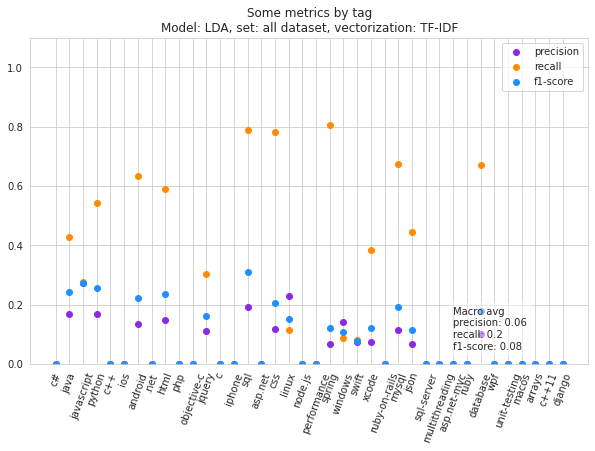

In [ ]:
diplay_and_plot_report(y_true, y_pred, 'LDA', 'all dataset', 'TF-IDF')

We can see that the scores obtained for our chosen matrix in this classification are not satisfactory. 

# Conclusion

Based on the evaluations of each model we conclude that the best model that fit our purposes is **Naive Bayes Classifier** where the feature matrix consists of embedding our documents (StackOverflow questions) using **Universal Sentence Encoder (USE)**.

We train this model on all the data (50 000 documents) in a separate notebook. 